In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  roc_curve, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv('recipes.csv')
print(df.shape)
df.head()

(10566, 152)


Unnamed: 0  salt  oil  garlic  ...  fillets  lettuce  mayonaise      country
0         450   1.0  0.0     1.0  ...      0.0      0.0        0.0  southern_us
1       11584   1.0  0.0     0.0  ...      0.0      0.0        0.0       french
2        4645   0.0  1.0     1.0  ...      0.0      0.0        0.0  southern_us
3       11074   0.0  1.0     1.0  ...      0.0      0.0        0.0       french
4        4783   0.0  0.0     0.0  ...      0.0      0.0        0.0        greek

[5 rows x 152 columns]

In [ ]:
df.describe()

Unnamed: 0          salt  ...       lettuce     mayonaise
count  10566.000000  10566.000000  ...  10566.000000  10566.000000
mean    5848.343555      0.592466  ...      0.028204      0.022904
std     3390.135330      0.491399  ...      0.165562      0.149603
min        0.000000      0.000000  ...      0.000000      0.000000
25%     2909.250000      0.000000  ...      0.000000      0.000000
50%     5823.500000      1.000000  ...      0.000000      0.000000
75%     8781.750000      1.000000  ...      0.000000      0.000000
max    11740.000000      1.000000  ...      1.000000      1.000000

[8 rows x 151 columns]

svaka vrsta je jedan recept u kod pise kojih sastojaka ima

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10566 entries, 0 to 10565
Columns: 152 entries, Unnamed: 0 to country
dtypes: float64(150), int64(1), object(1)
memory usage: 12.3+ MB
None


152: to je 150 sastojaka(float), 1 drzava(object), unnamed(int).
Uklonim unnamed i drzavu (to ce biti kategorija tj to se predvidja).

In [ ]:
df.drop(['Unnamed: 0'], inplace= True, axis = 1)

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
country           0      0.0
scallions         0      0.0
beans             0      0.0
thyme             0      0.0
white wine        0      0.0
...             ...      ...
fish sauce        0      0.0
egg whites        0      0.0
white sugar       0      0.0
ground cumin      0      0.0
salt              0      0.0

[151 rows x 2 columns]

nema nan vrednosti

In [ ]:
print(df['country'].unique())

['southern_us' 'french' 'greek' 'mexican' 'italian' 'japanese' 'chinese'
 'thai' 'british']


In [ ]:
pom=df.groupby('country')
df1=pom.sum()
df1

salt     oil  garlic  ...  fillets  lettuce  mayonaise
country                              ...                             
british       342.0   124.0    74.0  ...     19.0      2.0        5.0
chinese       581.0   749.0   783.0  ...     19.0     44.0        7.0
french        982.0   611.0   508.0  ...     86.0     37.0       34.0
greek         369.0   399.0   307.0  ...      7.0     45.0        9.0
italian      1006.0  1069.0   910.0  ...     56.0     13.0        7.0
japanese      345.0   339.0   204.0  ...     50.0      4.0       32.0
mexican       759.0   552.0   649.0  ...     18.0     94.0       30.0
southern_us  1667.0   644.0   587.0  ...     36.0     26.0      110.0
thai          209.0   324.0   360.0  ...     20.0     33.0        8.0

[9 rows x 150 columns]

u 342 britanska recepta ima soli npr.

In [ ]:
df_b=df1.loc['british',:]#.sort_values(ascending=False)
df_b

salt            342.0
oil             124.0
garlic           74.0
pepper          118.0
sugar           244.0
                ...  
peanut oil        1.0
yellow onion     13.0
fillets          19.0
lettuce           2.0
mayonaise         5.0
Name: british, Length: 150, dtype: float64

ima 509 britanskih recepata. od 509 njih 342 ima so. 

In [ ]:
x_b=df_b.index.values

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

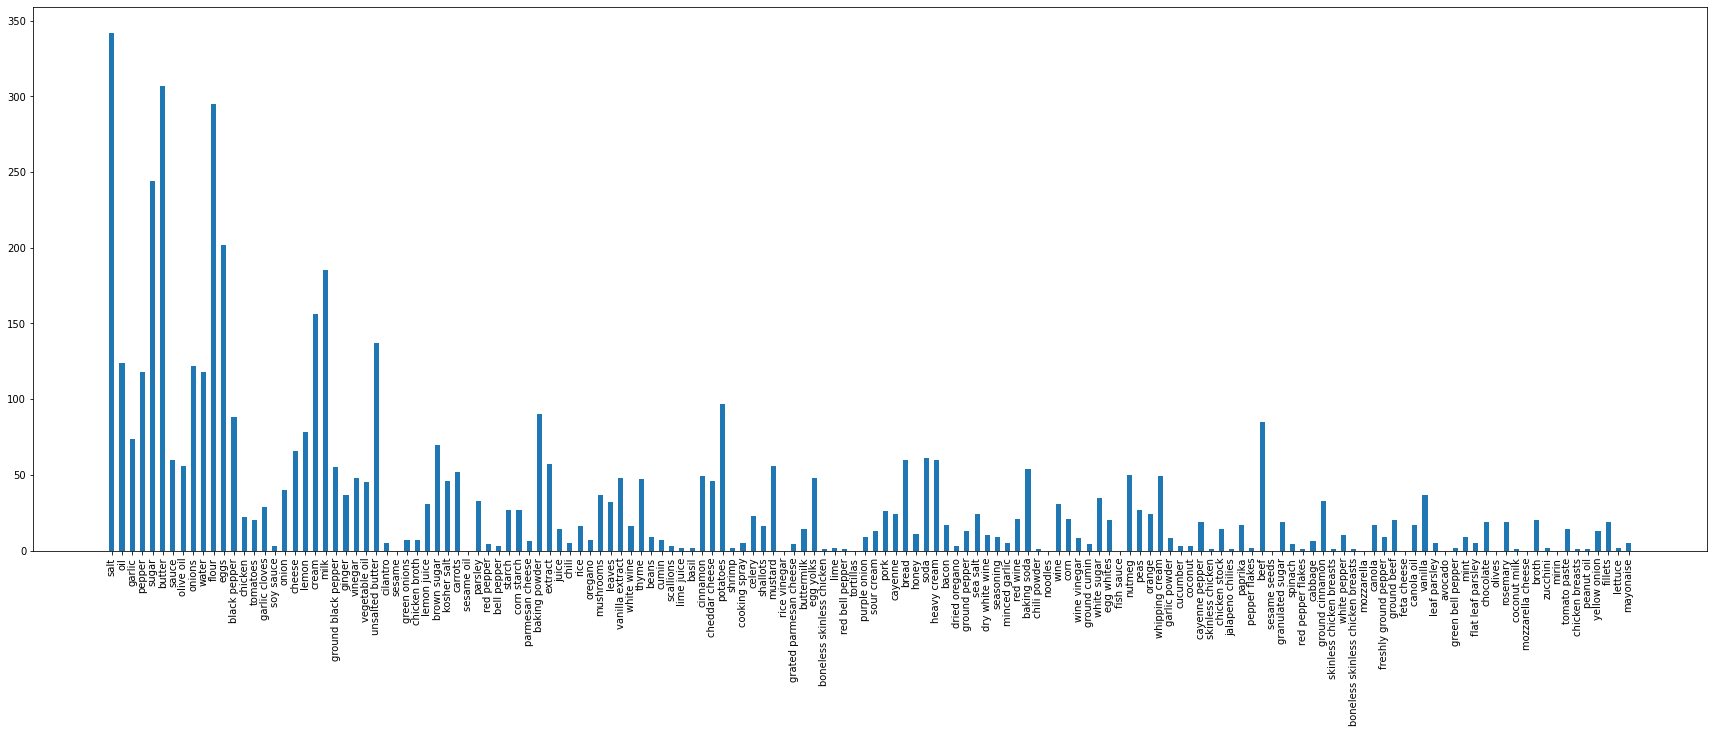

In [ ]:

plt.figure(figsize=(30,10))
plt.bar(x_b,df_b,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

sad za kinu
Ima 1291 recepata


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

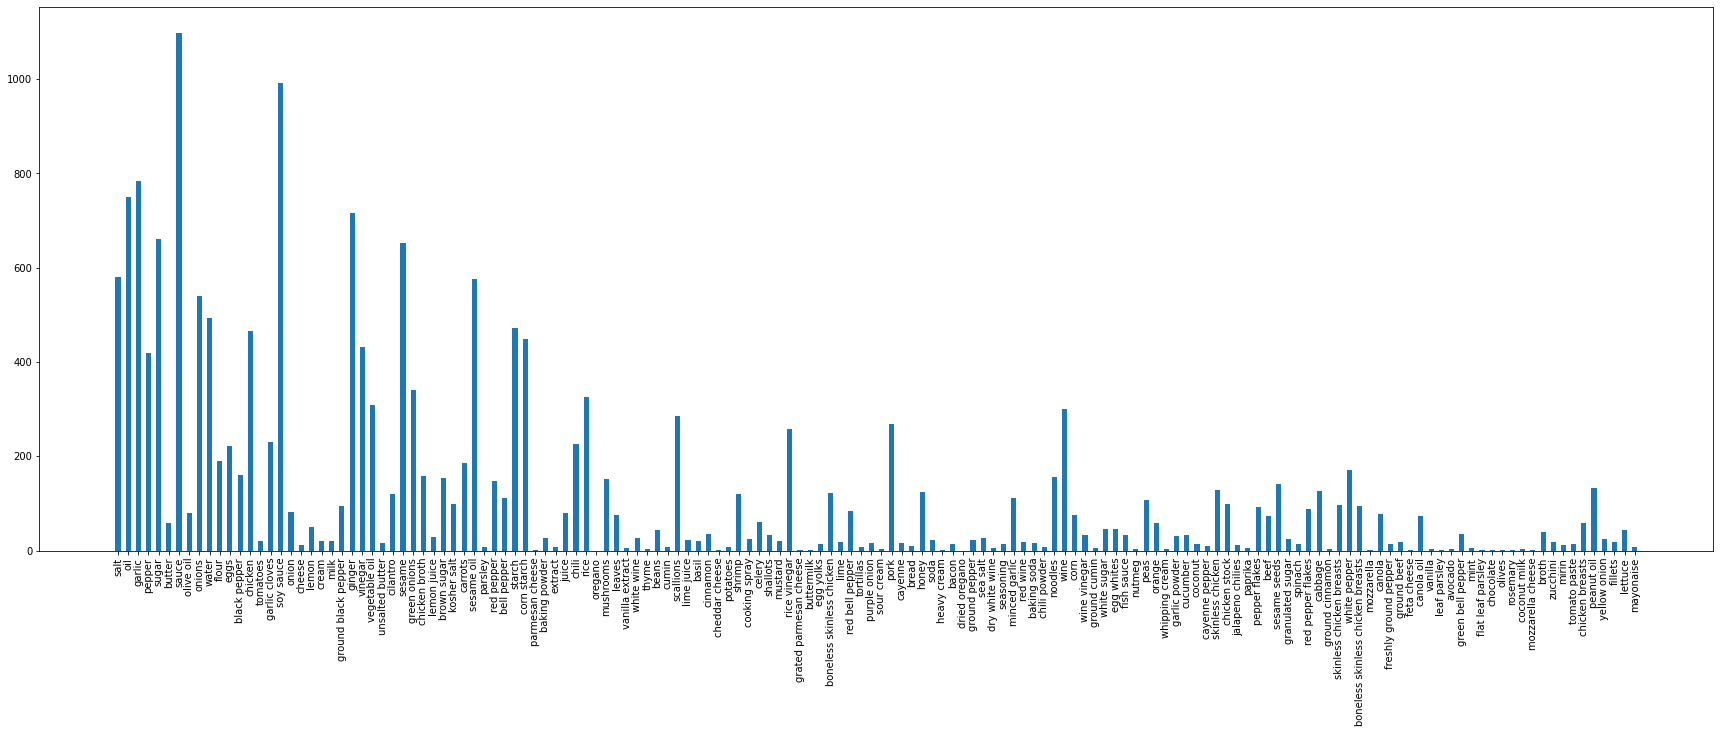

In [ ]:

df_c=df1.loc['chinese',:]#.sort_values(ascending=False)
df_c
x_c=df_c.index.values
plt.figure(figsize=(30,10))
plt.bar(x_c,df_c,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

sad francuska
ima 1565 recepata

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

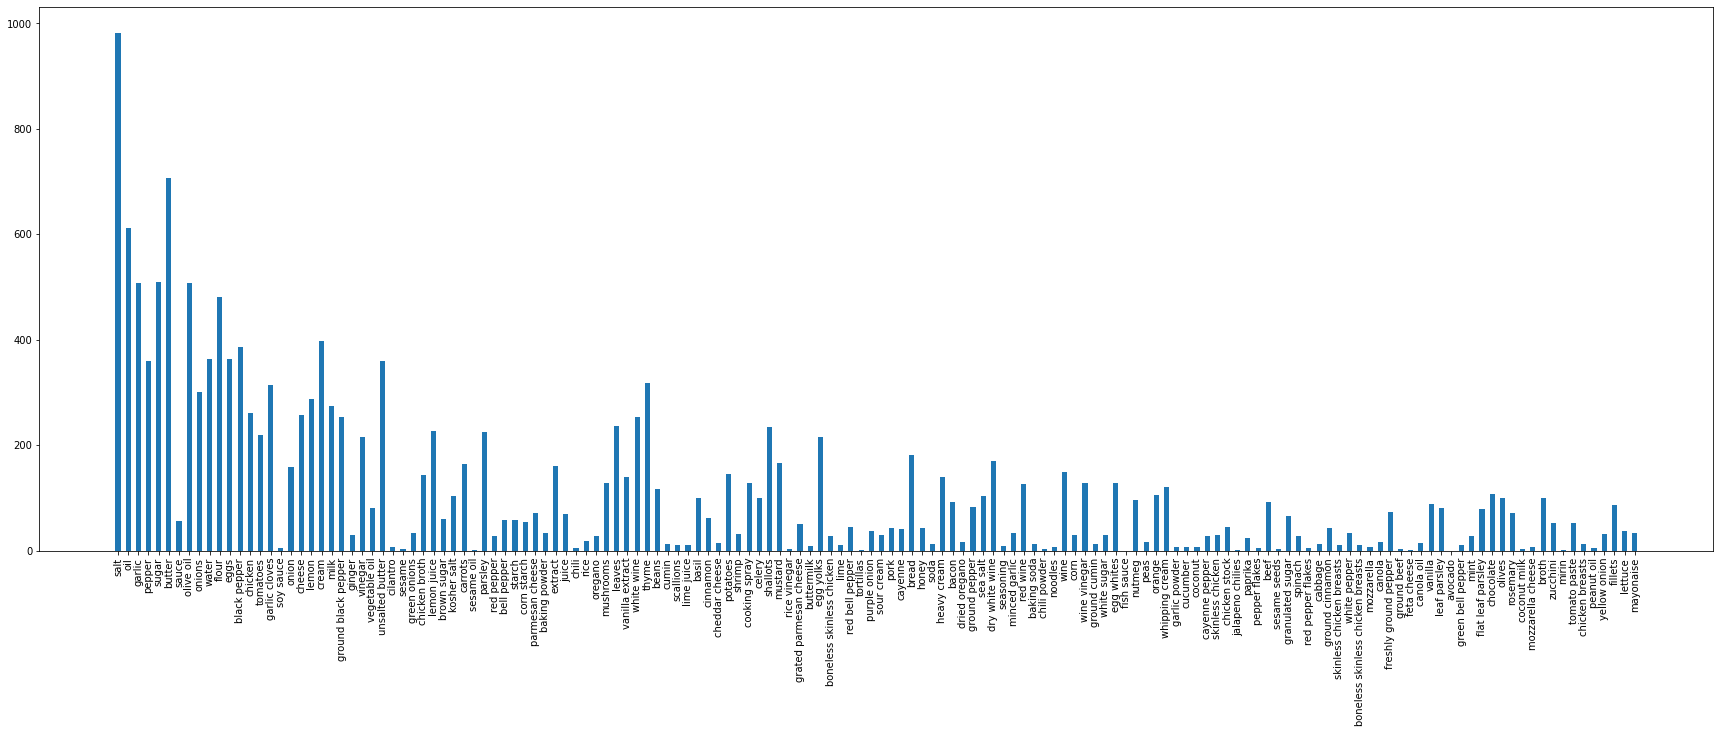

In [ ]:

df_f=df1.loc['french',:]#.sort_values(ascending=False)
df_f
x_f=df_f.index.values
plt.figure(figsize=(30,10))
plt.bar(x_f,df_f,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

grcka
587

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

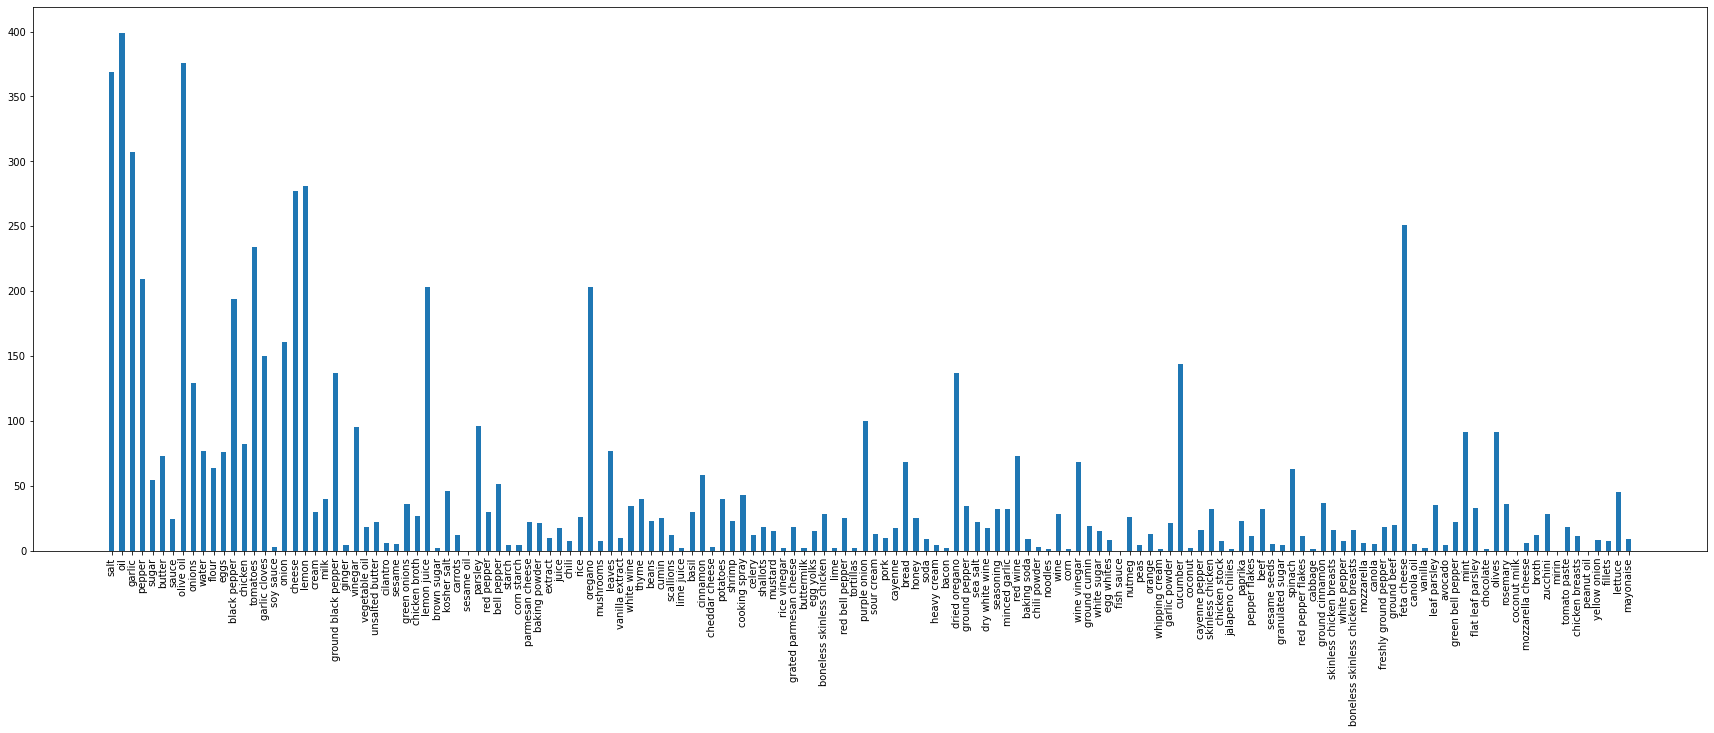

In [ ]:

df_g=df1.loc['greek',:]#.sort_values(ascending=False)
df_g
x_g=df_g.index.values
plt.figure(figsize=(30,10))
plt.bar(x_g,df_g,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

italija:1670

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

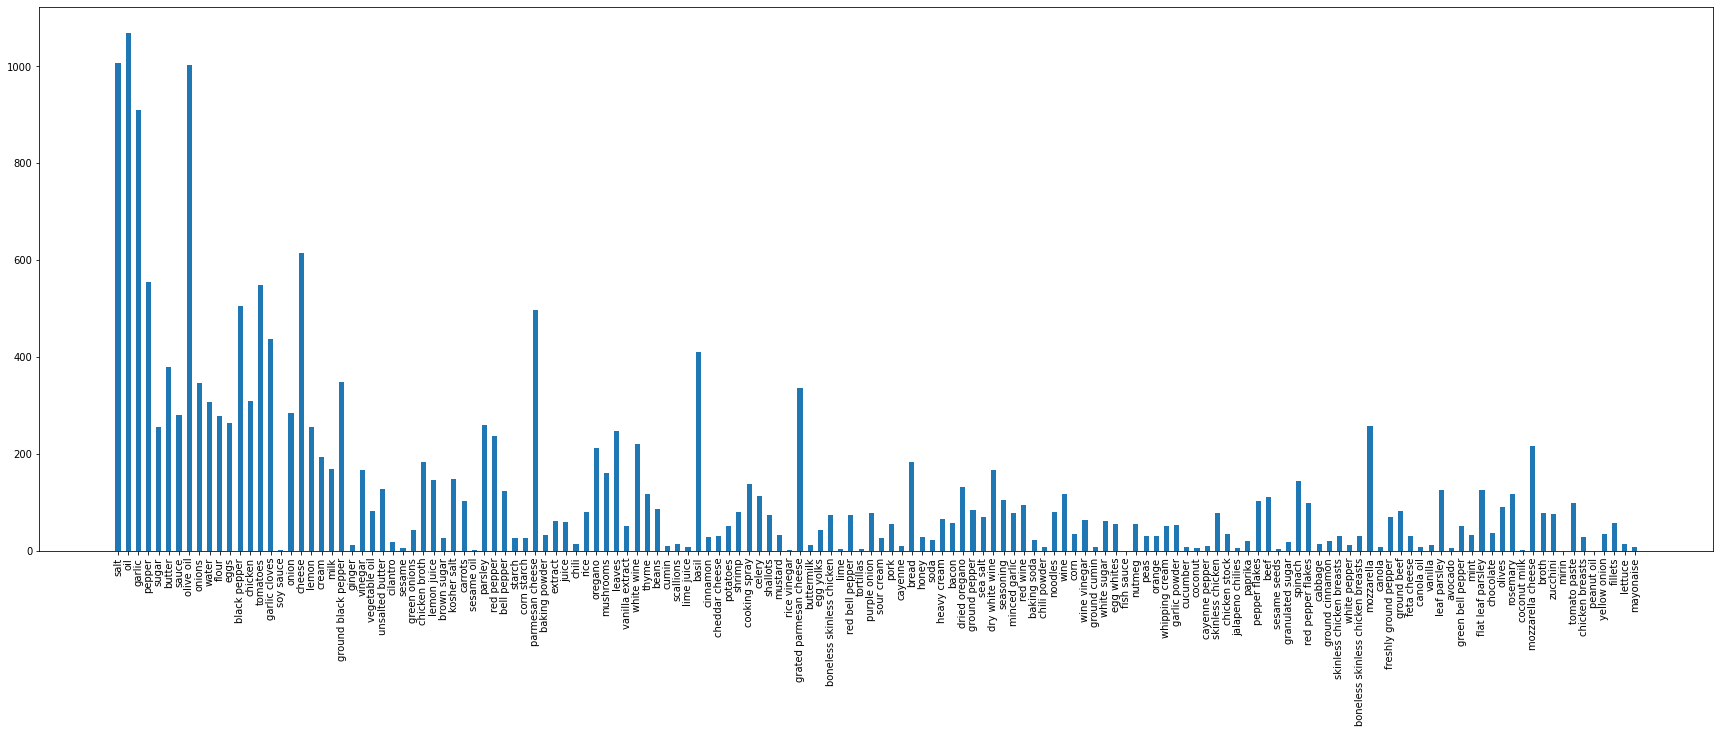

In [ ]:

df_i=df1.loc['italian',:]#.sort_values(ascending=False)
df_i
x_i=df_i.index.values
plt.figure(figsize=(30,10))
plt.bar(x_i,df_i,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

japan:755

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

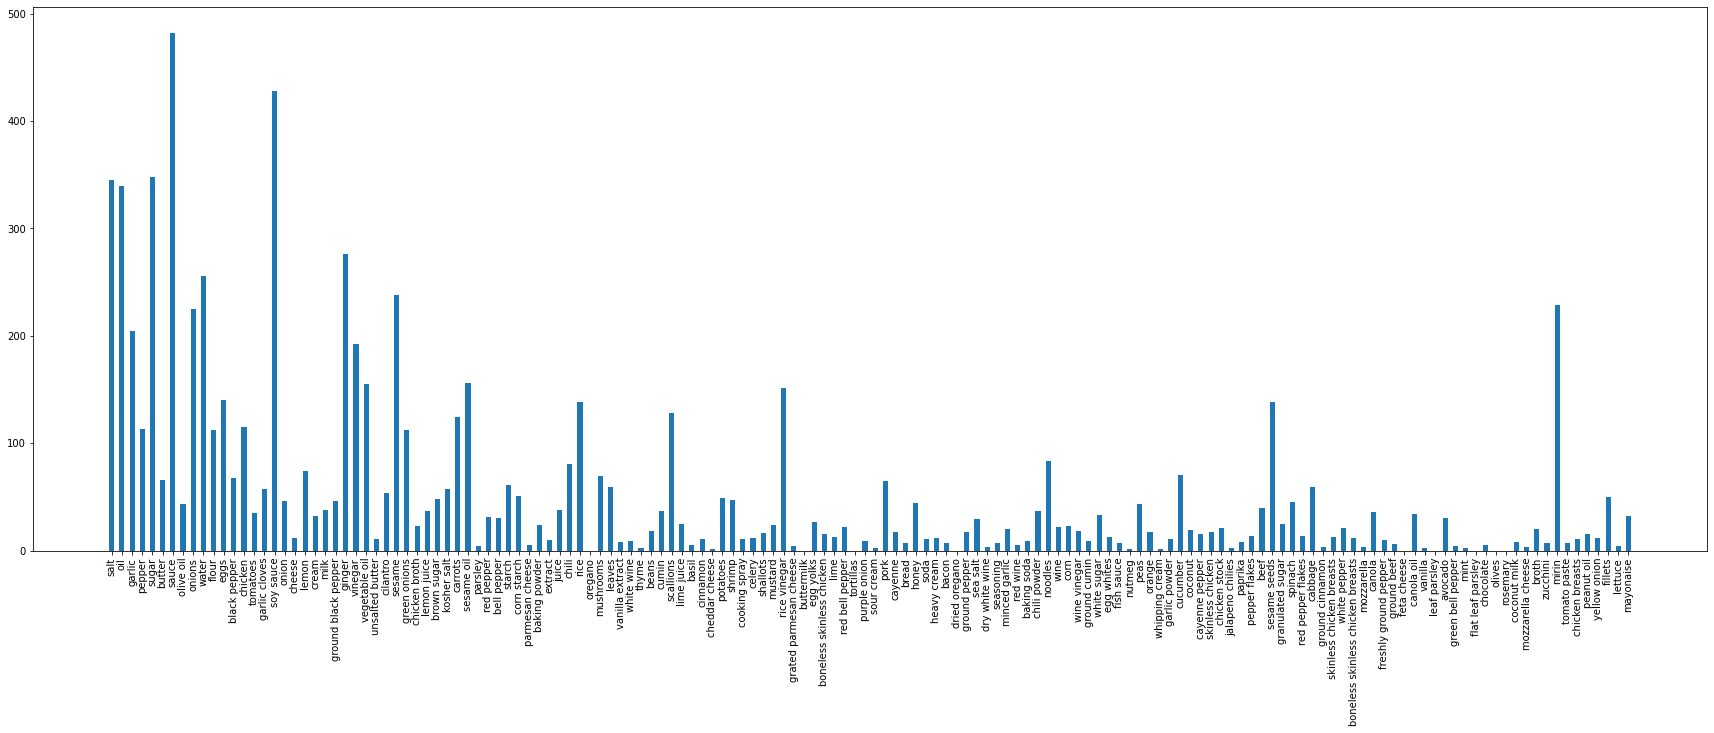

In [ ]:

df_j=df1.loc['japanese',:]#.sort_values(ascending=False)
df_j
x_j=df_j.index.values
plt.figure(figsize=(30,10))
plt.bar(x_j,df_j,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

maksiko: 1274

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

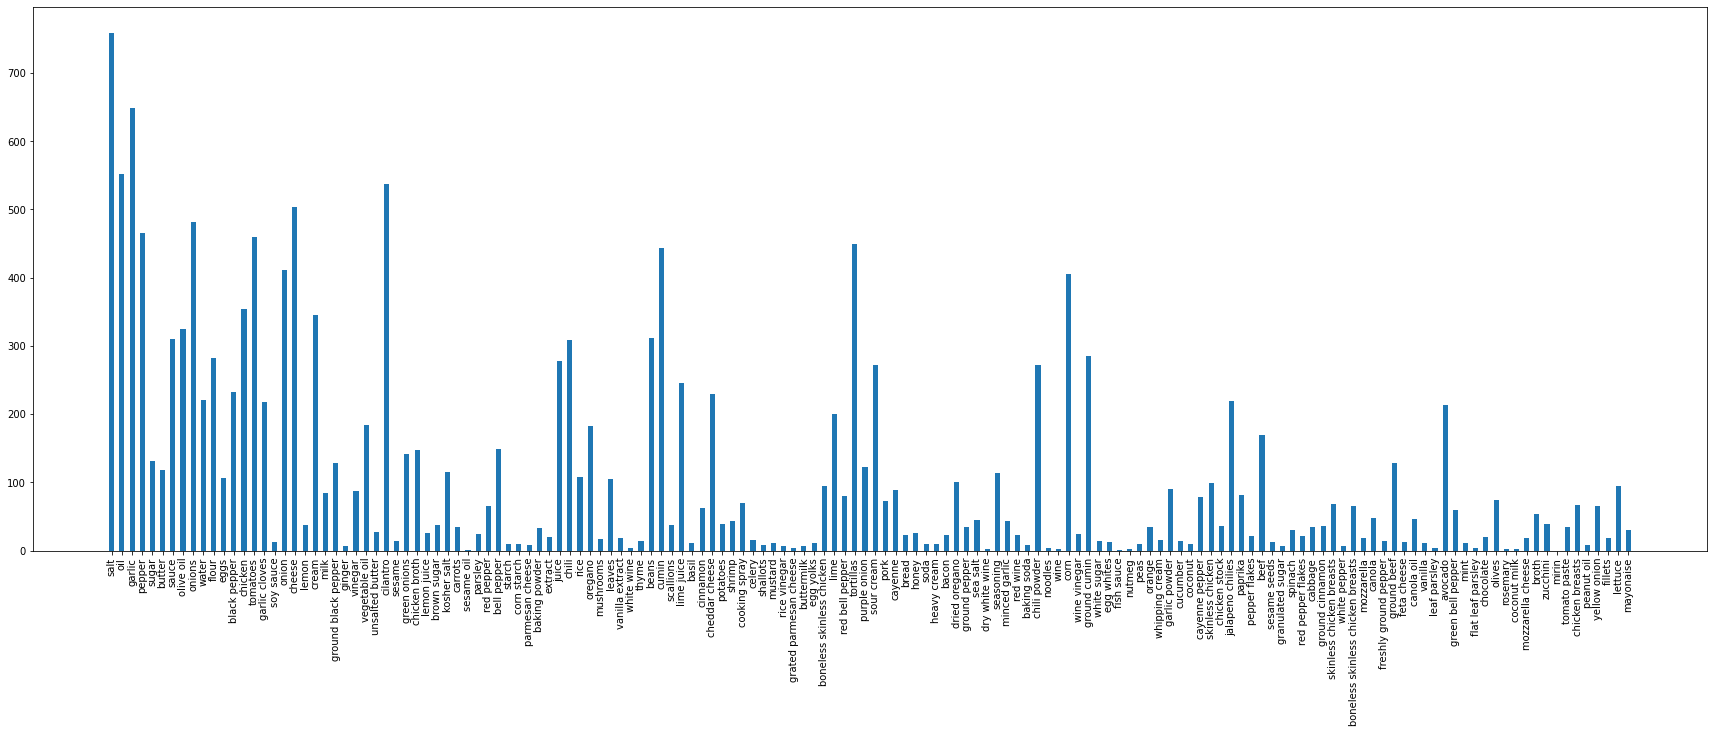

In [ ]:

df_m=df1.loc['mexican',:]#.sort_values(ascending=False)
df_m
x_m=df_m.index.values
plt.figure(figsize=(30,10))
plt.bar(x_m,df_m,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

us:2303

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

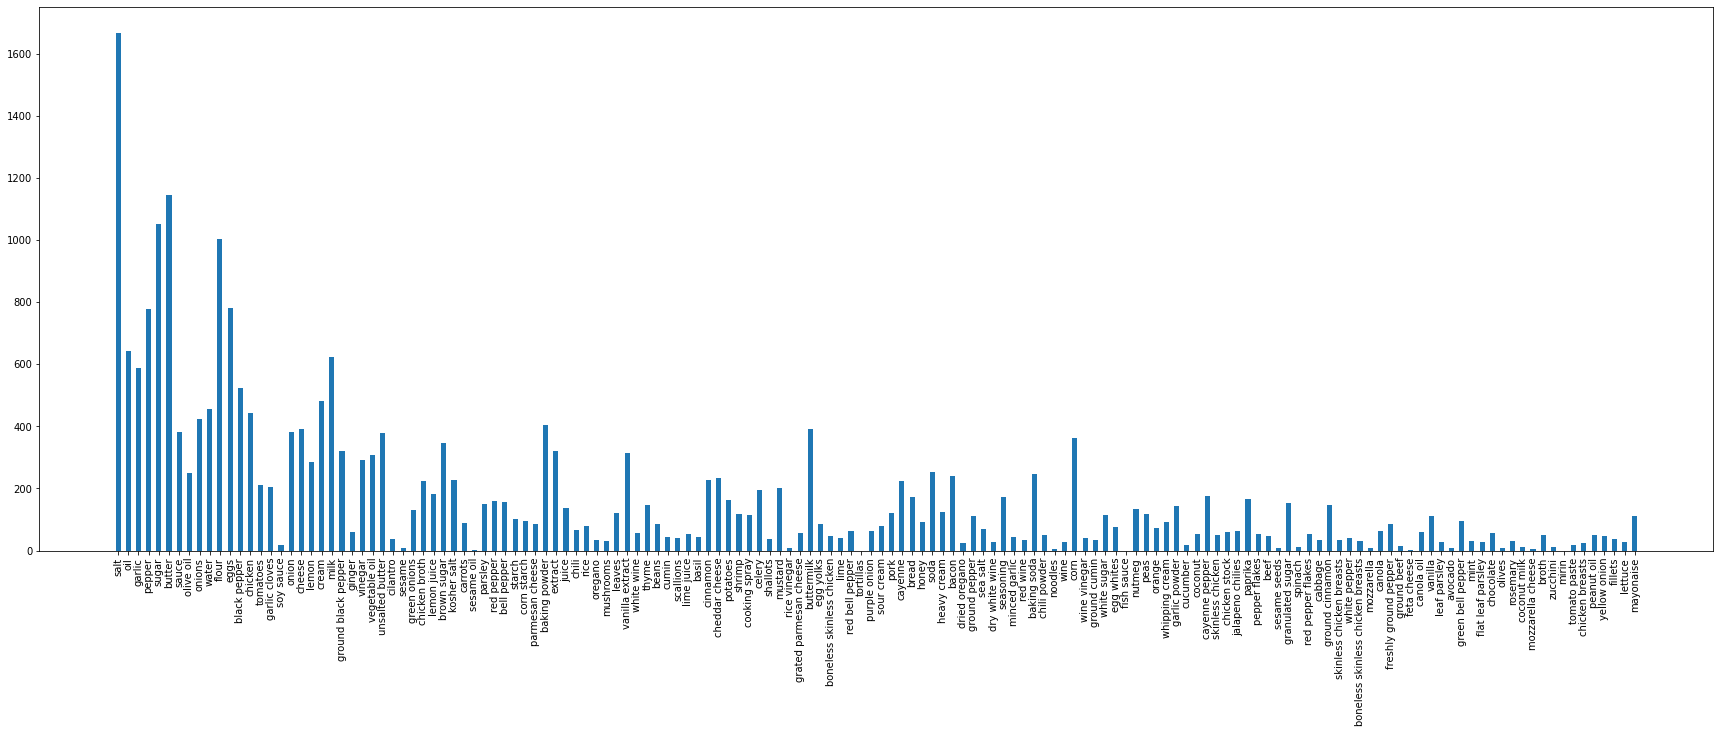

In [ ]:

df_u=df1.loc['southern_us',:]#.sort_values(ascending=False)
df_u
x_u=df_u.index.values
plt.figure(figsize=(30,10))
plt.bar(x_u,df_u,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

tajland: 612

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 <a list of 150 Text major ticklabel objects>)

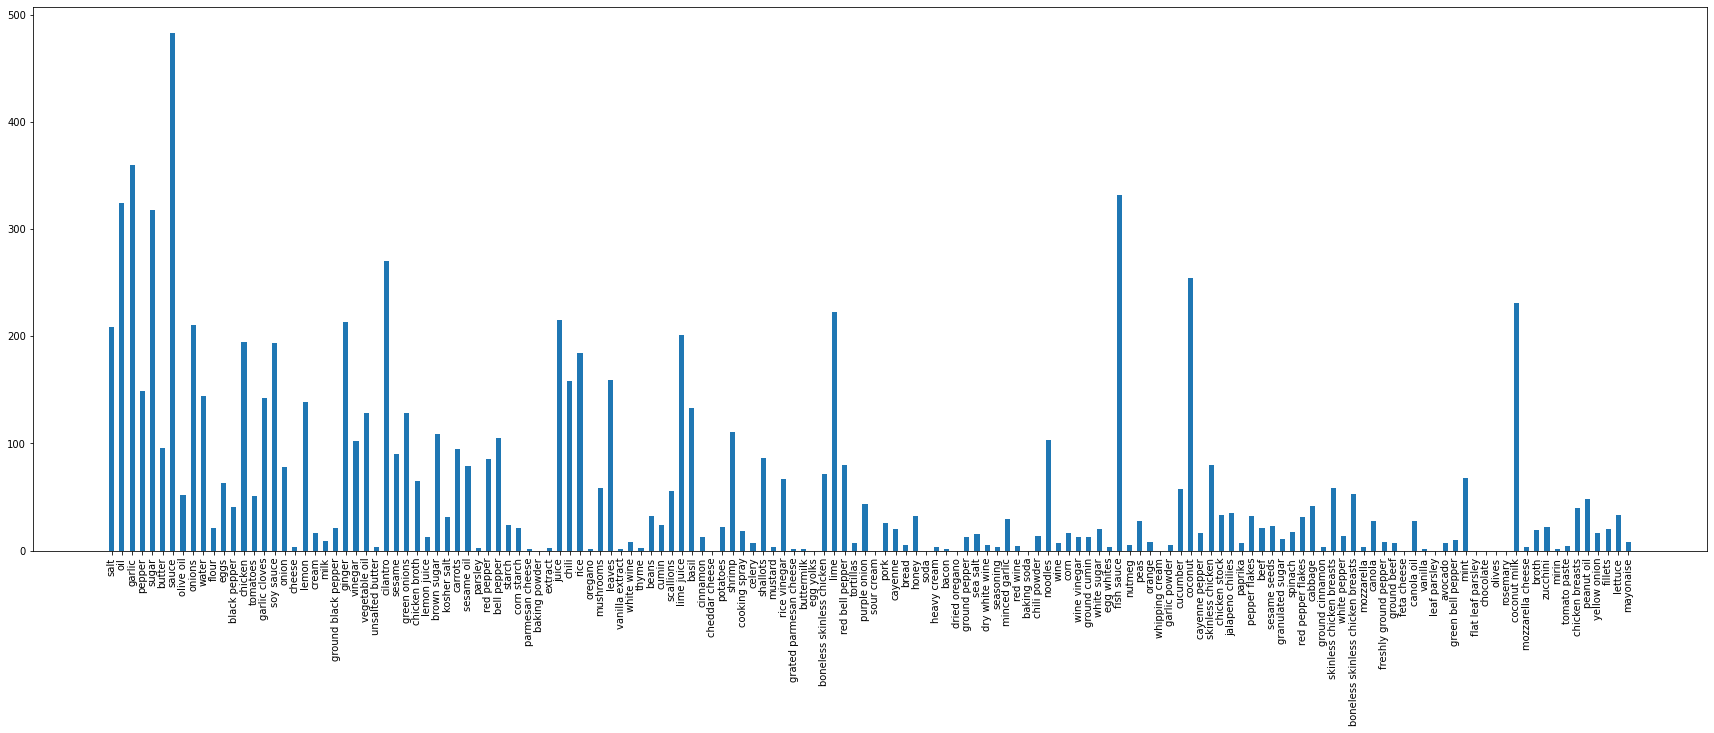

In [ ]:

df_t=df1.loc['thai',:]#.sort_values(ascending=False)
df_t
x_t=df_t.index.values
plt.figure(figsize=(30,10))
plt.bar(x_t,df_t,width=0.5)
plt.xticks(rotation=90)
#plt.gca().axes.get_xaxis().set_visible(False)

In [ ]:
#print(df1.loc['british',:].sort_values(ascending=False))
#print(df1.loc['chinese',:].sort_values(ascending=False))
#print(df1.loc['french',:].sort_values(ascending=False))
#print(df1.loc['greek',:].sort_values(ascending=False))
#print(df1.loc['italian',:].sort_values(ascending=False))
#print(df1.loc['japanese',:].sort_values(ascending=False))
#print(df1.loc['mexican',:].sort_values(ascending=False))
#print(df1.loc['southern_us',:].sort_values(ascending=False))
print(df1.loc['thai',:].sort_values(ascending=False))

sauce                483.0
garlic               360.0
fish sauce           332.0
oil                  324.0
sugar                318.0
                     ...  
sour cream             0.0
chocolate              0.0
flat leaf parsley      0.0
soda                   0.0
cheddar cheese         0.0
Name: thai, Length: 150, dtype: float64


Podela na trening i test skup

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print('nedostajućih vrednosti ima: ', X.isnull().sum().sum())
print('oznake klasa su: ', y.unique())
print('uzoraka u prvoj klasi ima: ', sum(y=='british'))
print('uzoraka u drugoj klasi ima: ', sum(y=='chinese'))
print('uzoraka u trecoj klasi ima: ', sum(y=='french'))
print('uzoraka u cetvrtoj klasi ima: ', sum(y=='greek'))
print('uzoraka u petoj klasi ima: ', sum(y=='italian'))
print('uzoraka u sestoj klasi ima: ', sum(y=='japanese'))
print('uzoraka u sedmoj klasi ima: ', sum(y=='mexican'))
print('uzoraka u osmoj klasi ima: ', sum(y=='southern_us'))
print('uzoraka u devetoj klasi ima: ', sum(y=='thai'))

nedostajućih vrednosti ima:  0
oznake klasa su:  ['southern_us' 'french' 'greek' 'mexican' 'italian' 'japanese' 'chinese'
 'thai' 'british']
uzoraka u prvoj klasi ima:  509
uzoraka u drugoj klasi ima:  1291
uzoraka u trecoj klasi ima:  1565
uzoraka u cetvrtoj klasi ima:  587
uzoraka u petoj klasi ima:  1670
uzoraka u sestoj klasi ima:  755
uzoraka u sedmoj klasi ima:  1274
uzoraka u osmoj klasi ima:  2303
uzoraka u devetoj klasi ima:  612


undersampling i upsampling

In [ ]:
y

0        southern_us
1             french
2        southern_us
3             french
4              greek
            ...     
10561    southern_us
10562       japanese
10563        mexican
10564       japanese
10565           thai
Name: country, Length: 10566, dtype: object

In [ ]:
# podela podataka na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

In [ ]:
nedupl_ind = y_train.loc[(y_train=='southern_us')|(y_train=='chinese')|(y_train=='french')|(y_train=='mexican')|(y_train=='italian')].index #tu ce biti oni koji se ne dupliraju
dupl_ind = y_train.loc[(y_train!='southern_us')&(y_train!='chinese')&(y_train!='french')&(y_train!='mexican')&(y_train!='italian')].index #tu ce biti svi oni koji se dupliraju
y_upsample = y_train.copy(deep=True)
X_upsample = X_train.copy(deep=True)

X_dupl = X_train.loc[dupl_ind,:]
X_duplicated = pd.concat([X_dupl]*2, ignore_index=True)
X_upsample = X_duplicated.append(X_train.loc[nedupl_ind,:], ignore_index=True)

y_dupl = y_train.loc[dupl_ind]
y_duplicated = pd.concat([y_dupl]*2, ignore_index=True)
y_upsample = y_duplicated.append(y_train.loc[nedupl_ind], ignore_index=True)
        
print('original X: ', X_train.shape)
print('original y: ', y_train.shape)
print('redukovan X: ', X_upsample.shape)
print('redukovan y: ', y_upsample.shape)


original X:  (9509, 150)
original y:  (9509,)
redukovan X:  (11725, 150)
redukovan y:  (11725,)


In [ ]:
US_ind = y_upsample.loc[y_upsample=='southern_us'].index
US_ind_red1 = US_ind[::2]
US_ind_red2 = US_ind[::5]
rest_ind = y_upsample.loc[y_upsample!='southern_us'].index
keep_ind = np.concatenate((US_ind_red1,US_ind_red2,rest_ind))
y_undersample = y_upsample.copy(deep=True)
X_undersample = X_upsample.copy(deep=True)
for i in range(len(y_upsample)):
    if i not in keep_ind:
        y_undersample.drop(i, axis=0, inplace=True)
        X_undersample.drop(i, axis=0, inplace=True)
        
print('original X: ', X_upsample.shape)
print('original y: ', y_upsample.shape)
print('redukovan X: ', X_undersample.shape)
print('redukovan y: ', y_undersample.shape)

original X:  (11725, 150)
original y:  (11725,)
redukovan X:  (10896, 150)
redukovan y:  (10896,)


In [ ]:
labels_y = y_undersample.unique()
labels_y

array(['japanese', 'greek', 'thai', 'british', 'french', 'italian',
       'southern_us', 'chinese', 'mexican'], dtype=object)

In [ ]:
y_train.unique()

array(['french', 'japanese', 'italian', 'southern_us', 'greek', 'chinese',
       'thai', 'mexican', 'british'], dtype=object)

Unakrsna validacija

za parametre broj iteracija= 100 , solver= newton-cg  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


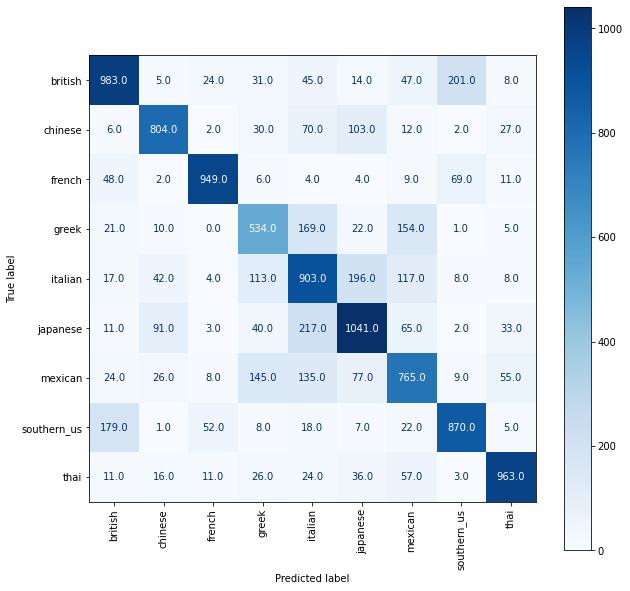

za parametre broj iteracija= 100 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


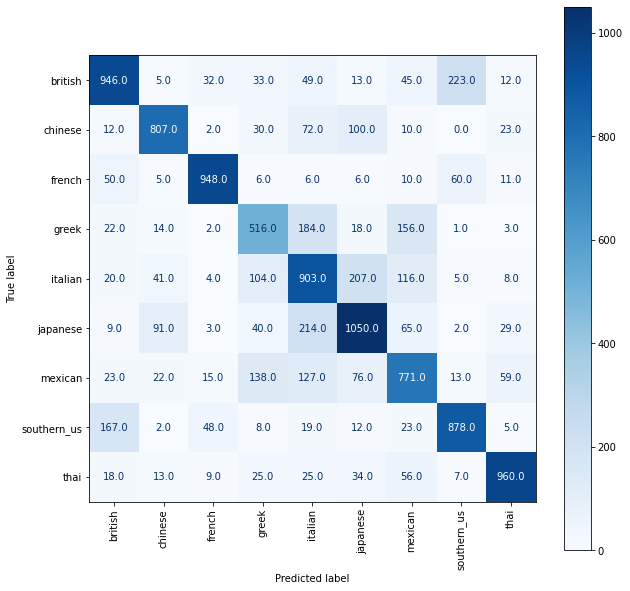

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


za parametre broj iteracija= 100 , solver= lbfgs  i pristup  auto  tacnost je:  0.7166839851627925  a mat. konf. je:


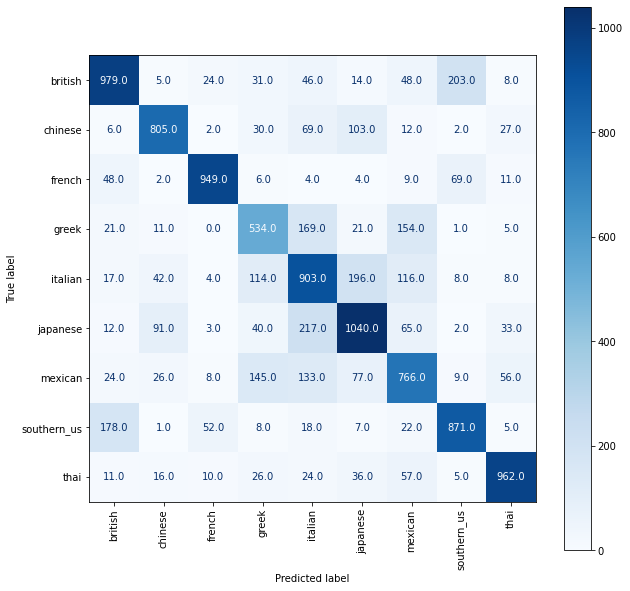

za parametre broj iteracija= 100 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


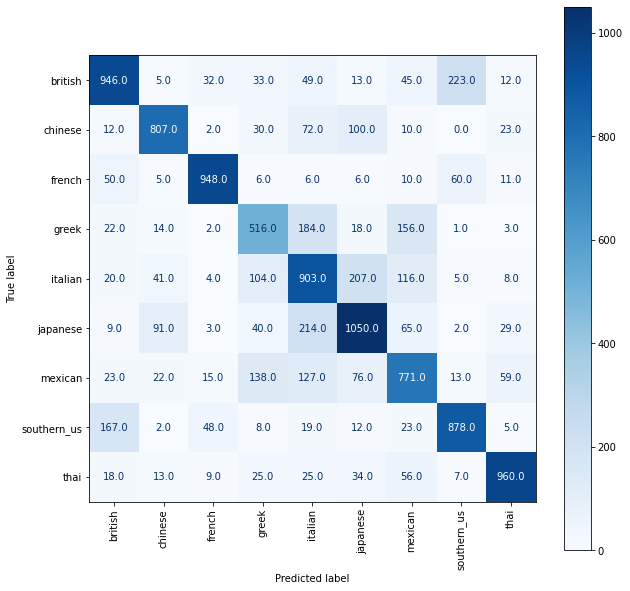

za parametre broj iteracija= 100 , solver= liblinear  i pristup  auto  tacnost je:  0.714022382121249  a mat. konf. je:


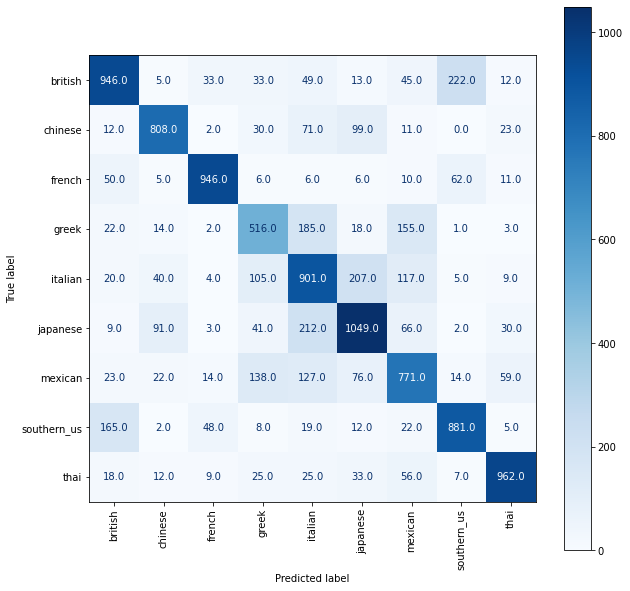

za parametre broj iteracija= 100 , solver= liblinear  i pristup  ovr  tacnost je:  0.714022382121249  a mat. konf. je:


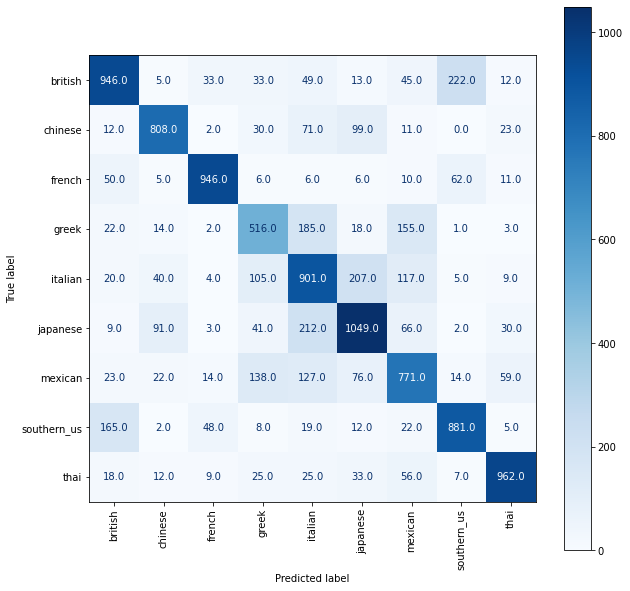

za parametre broj iteracija= 100 , solver= sag  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


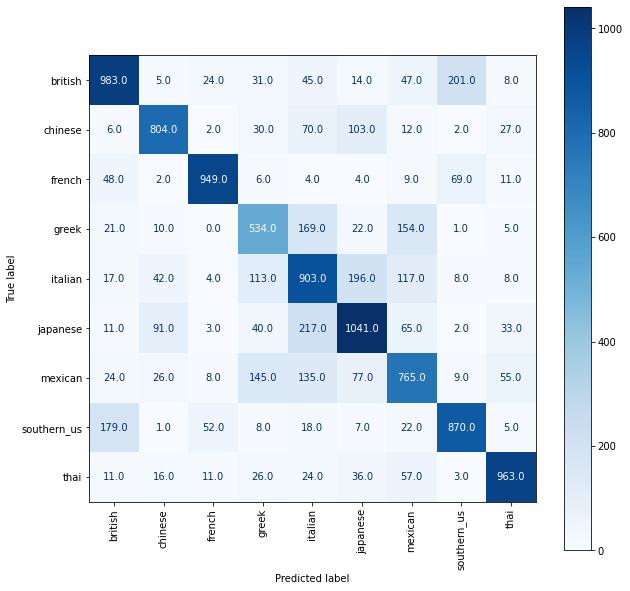

za parametre broj iteracija= 100 , solver= sag  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


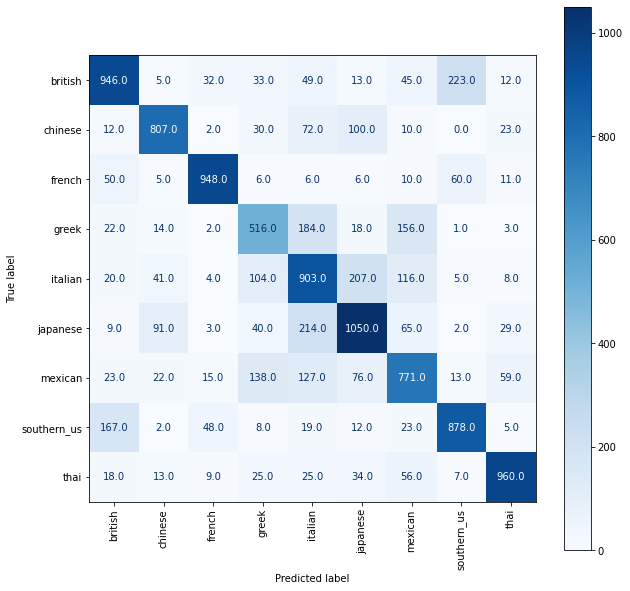

za parametre broj iteracija= 100 , solver= saga  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


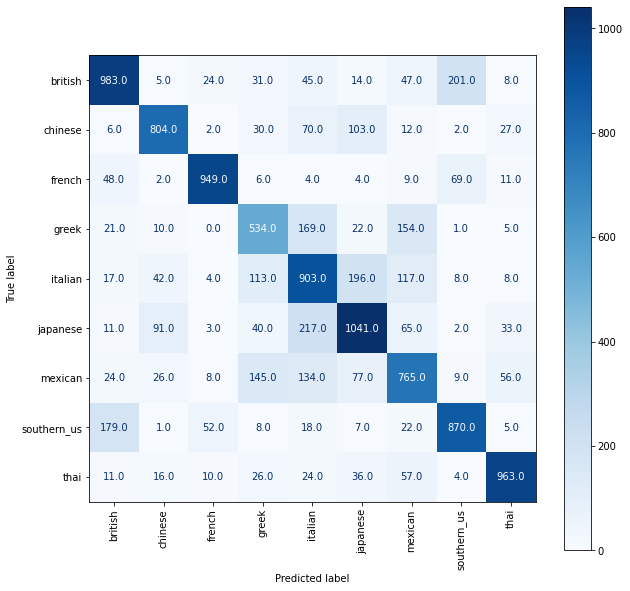

za parametre broj iteracija= 100 , solver= saga  i pristup  ovr  tacnost je:  0.71383893798603  a mat. konf. je:


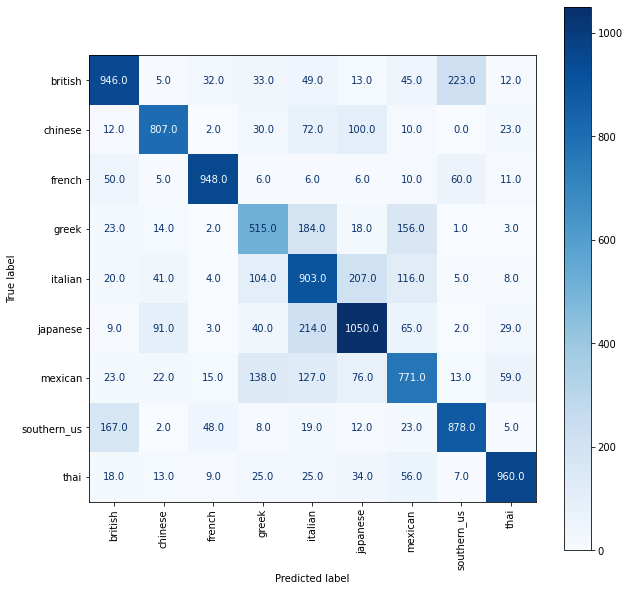

za parametre broj iteracija= 200 , solver= newton-cg  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


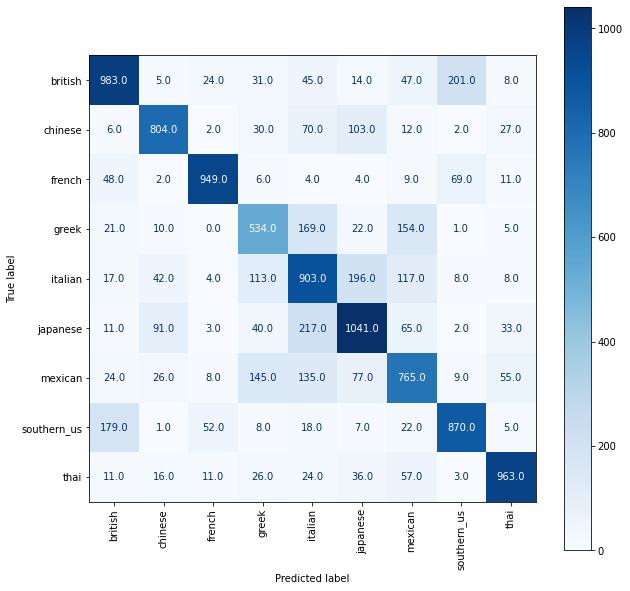

za parametre broj iteracija= 200 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


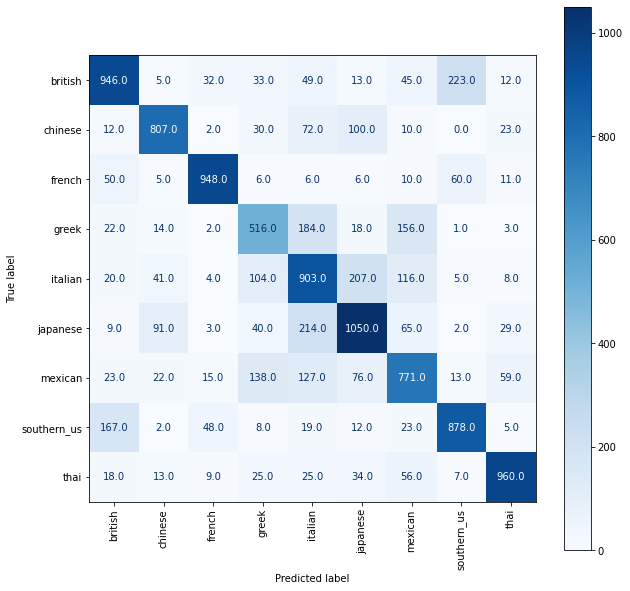

za parametre broj iteracija= 200 , solver= lbfgs  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


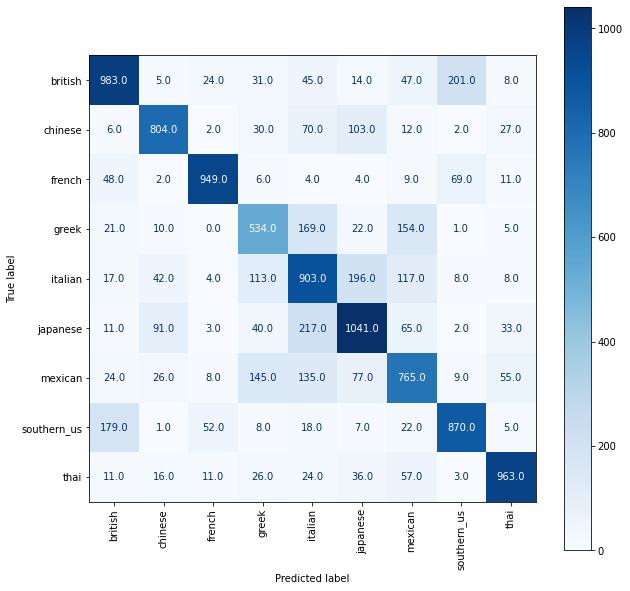

za parametre broj iteracija= 200 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


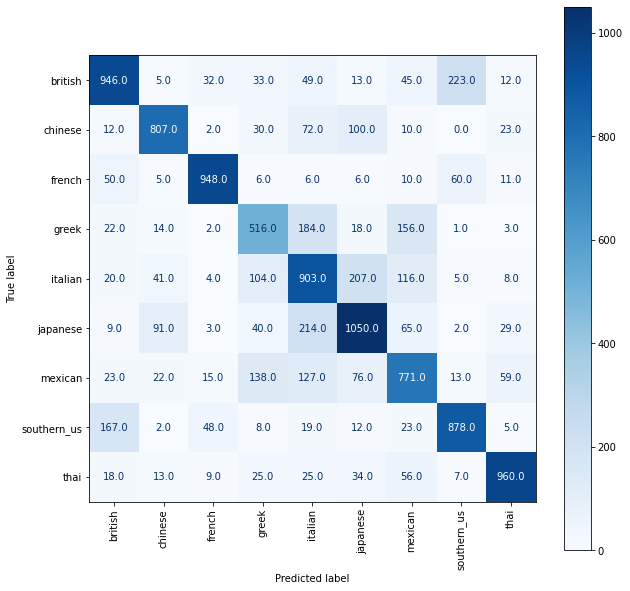

za parametre broj iteracija= 200 , solver= liblinear  i pristup  auto  tacnost je:  0.714022382121249  a mat. konf. je:


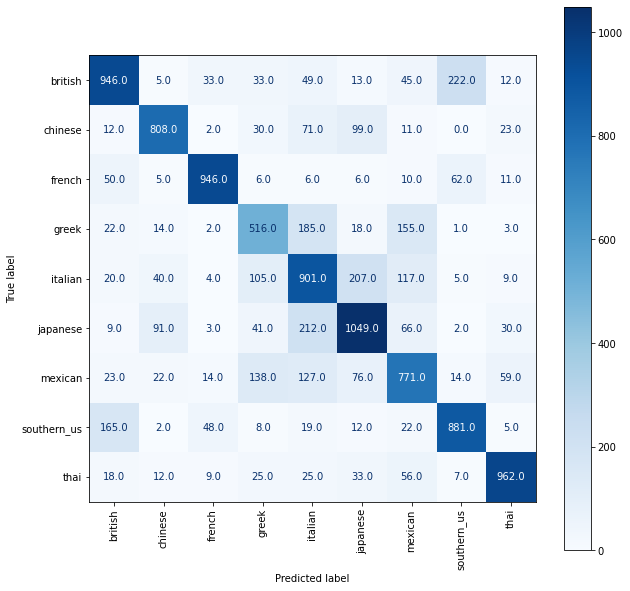

za parametre broj iteracija= 200 , solver= liblinear  i pristup  ovr  tacnost je:  0.714022382121249  a mat. konf. je:


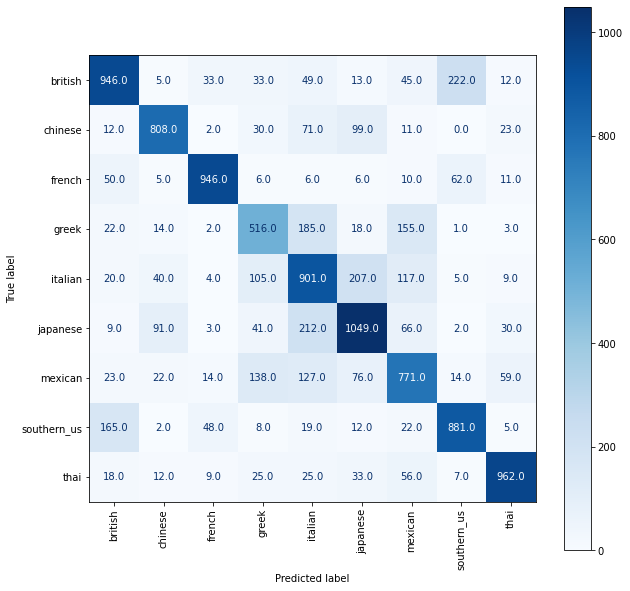

za parametre broj iteracija= 200 , solver= sag  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


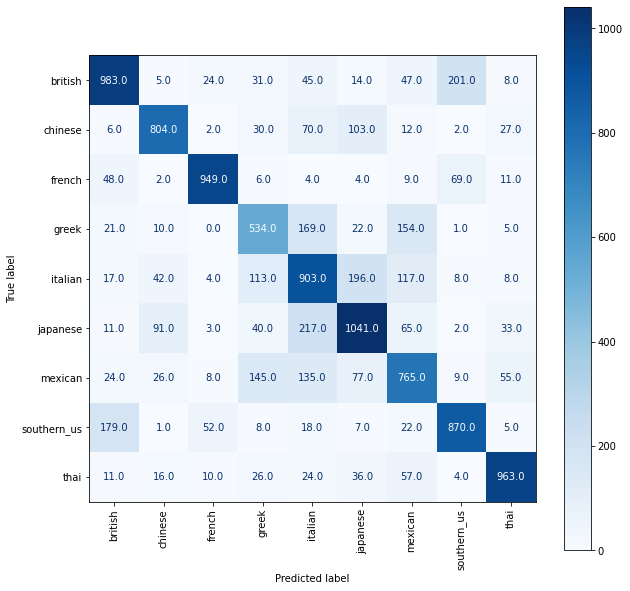

za parametre broj iteracija= 200 , solver= sag  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


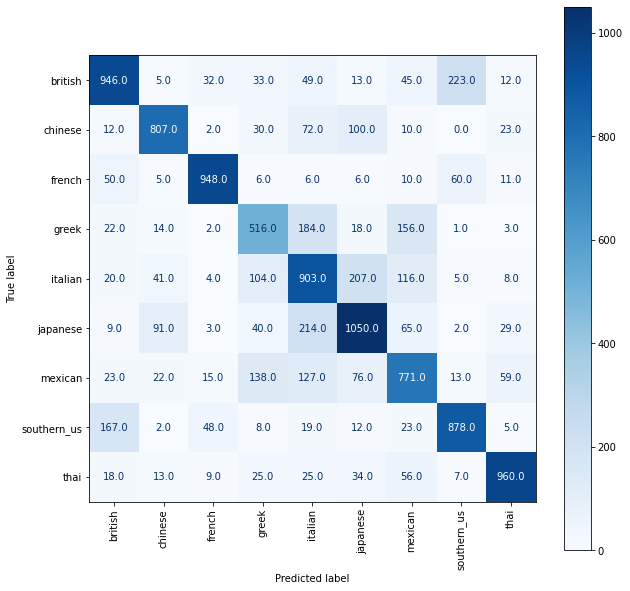

za parametre broj iteracija= 200 , solver= saga  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


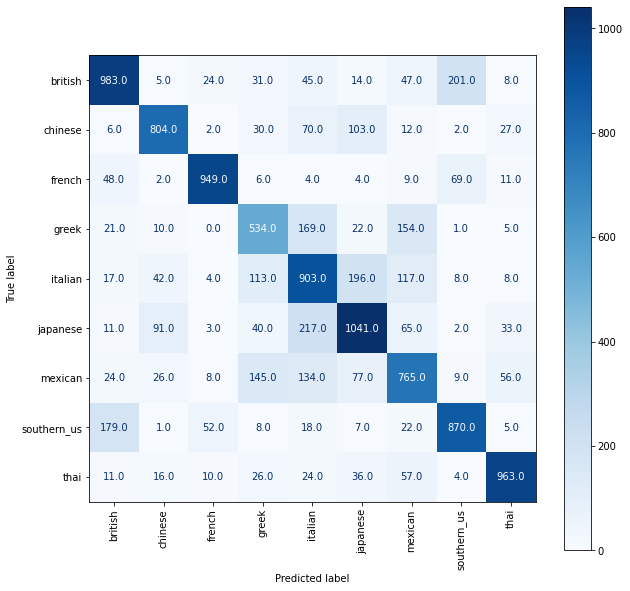

za parametre broj iteracija= 200 , solver= saga  i pristup  ovr  tacnost je:  0.71383893798603  a mat. konf. je:


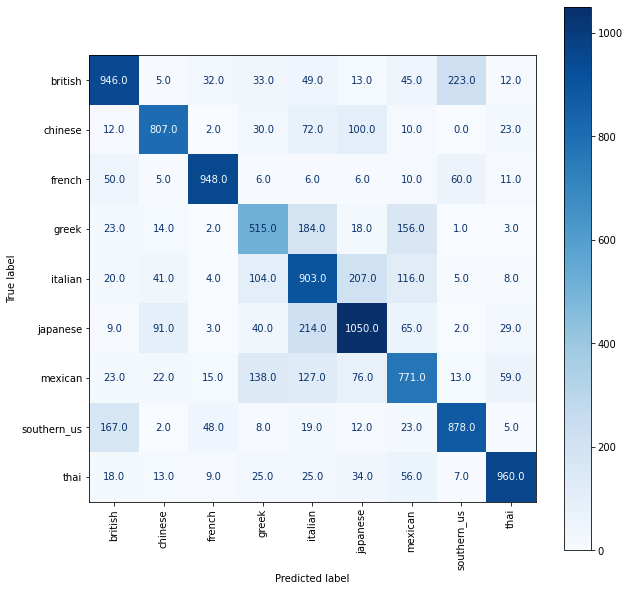

za parametre broj iteracija= 500 , solver= newton-cg  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


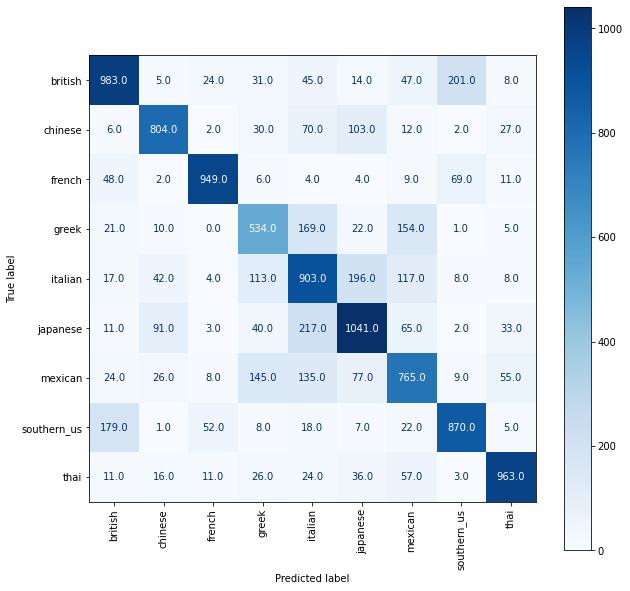

za parametre broj iteracija= 500 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


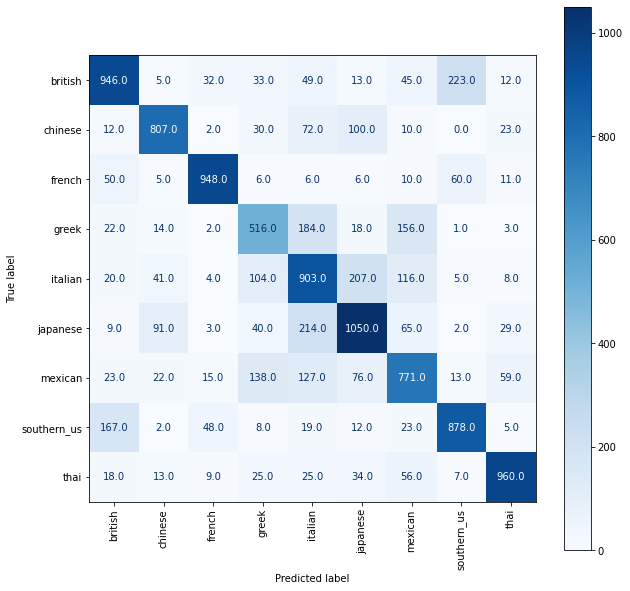

za parametre broj iteracija= 500 , solver= lbfgs  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


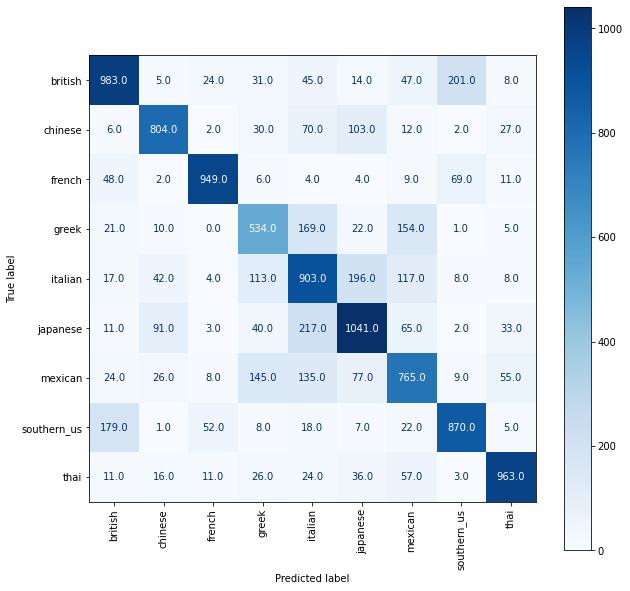

za parametre broj iteracija= 500 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


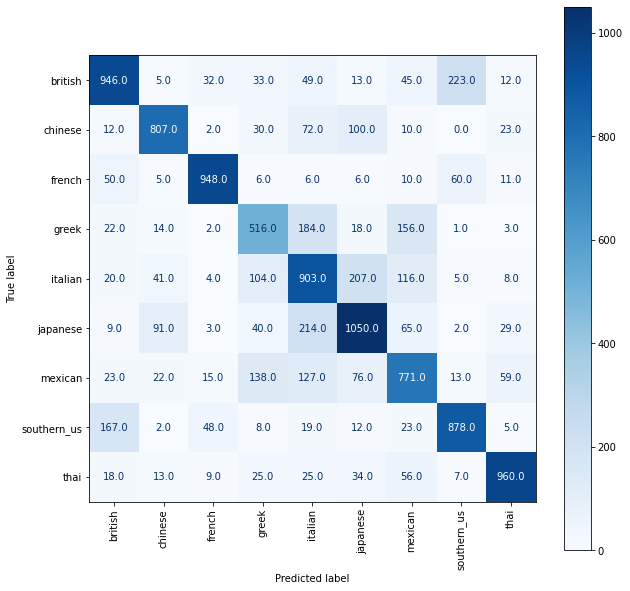

za parametre broj iteracija= 500 , solver= liblinear  i pristup  auto  tacnost je:  0.714022382121249  a mat. konf. je:


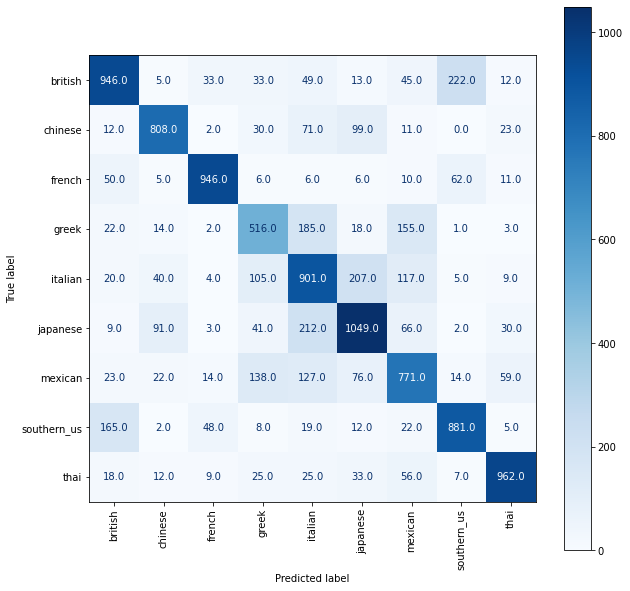

za parametre broj iteracija= 500 , solver= liblinear  i pristup  ovr  tacnost je:  0.714022382121249  a mat. konf. je:


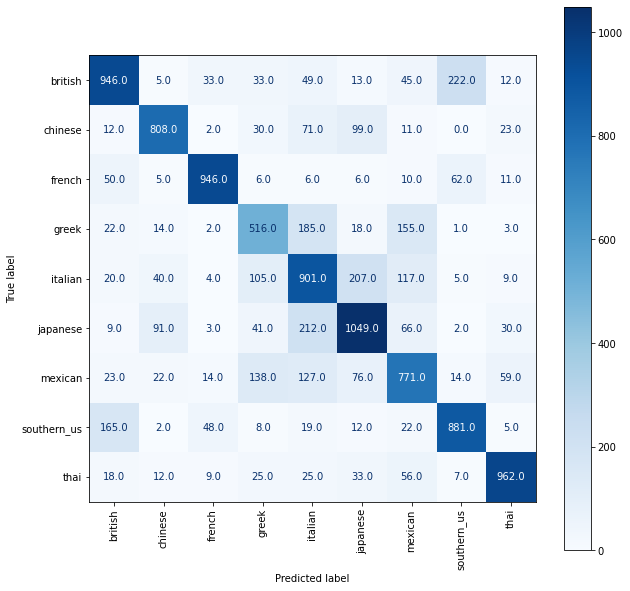

za parametre broj iteracija= 500 , solver= sag  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


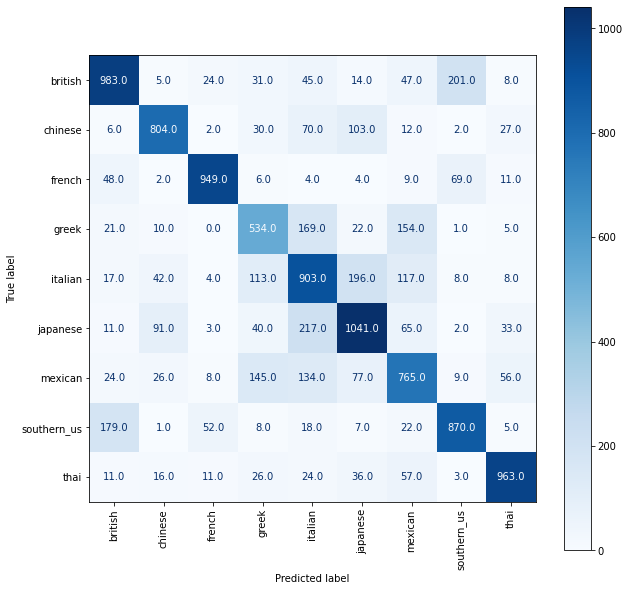

za parametre broj iteracija= 500 , solver= sag  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


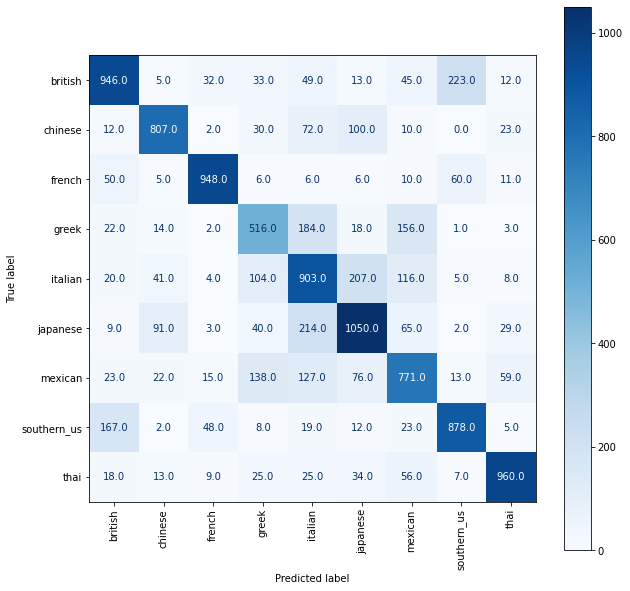

za parametre broj iteracija= 500 , solver= saga  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


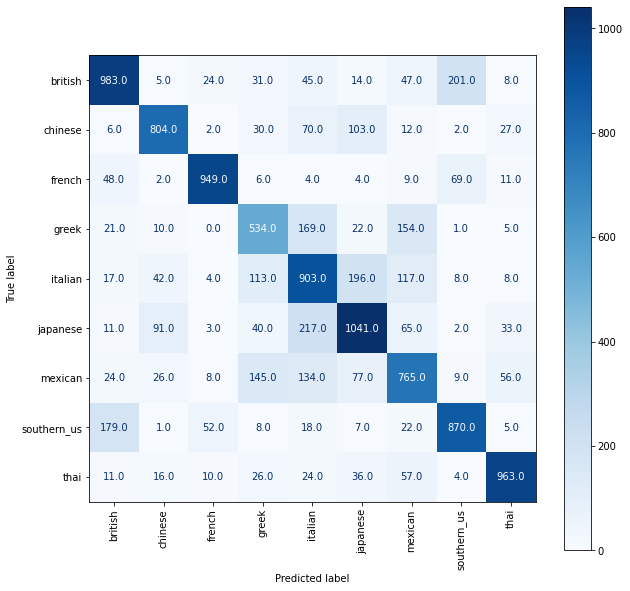

za parametre broj iteracija= 500 , solver= saga  i pristup  ovr  tacnost je:  0.71383893798603  a mat. konf. je:


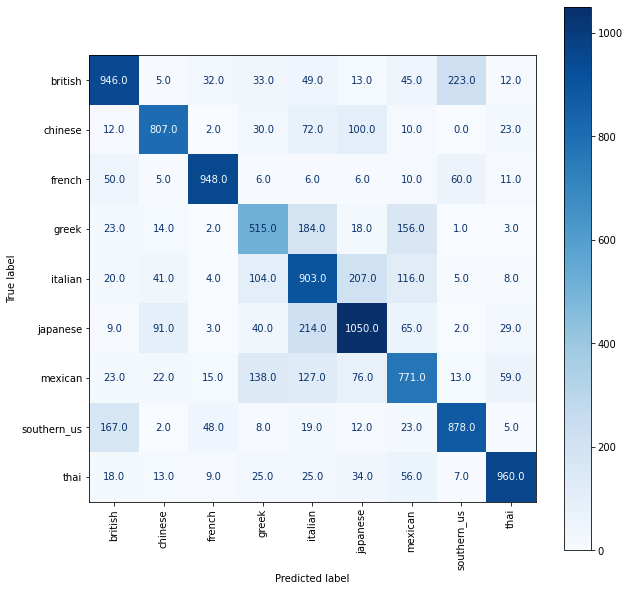

za parametre broj iteracija= 1000 , solver= newton-cg  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


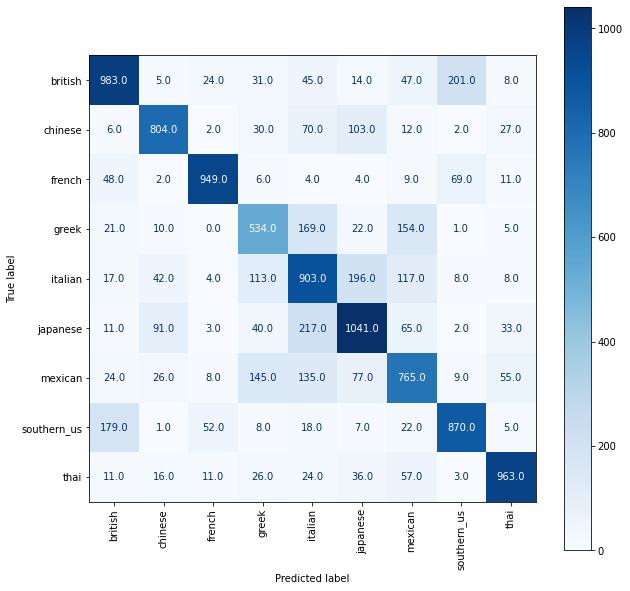

za parametre broj iteracija= 1000 , solver= newton-cg  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


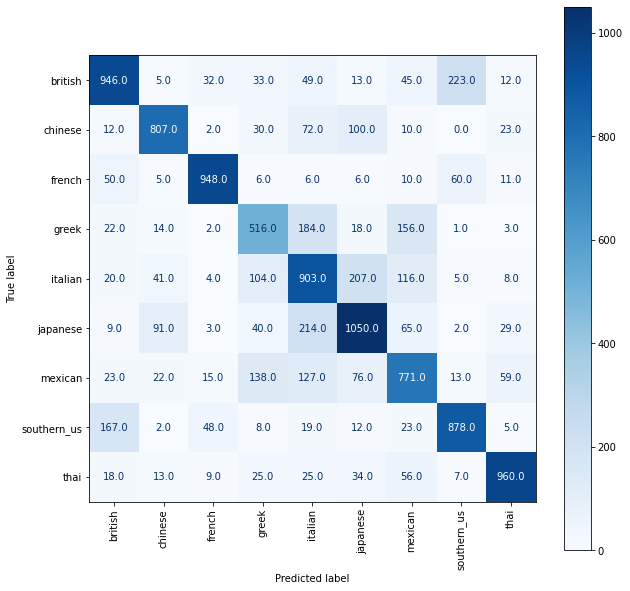

za parametre broj iteracija= 1000 , solver= lbfgs  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


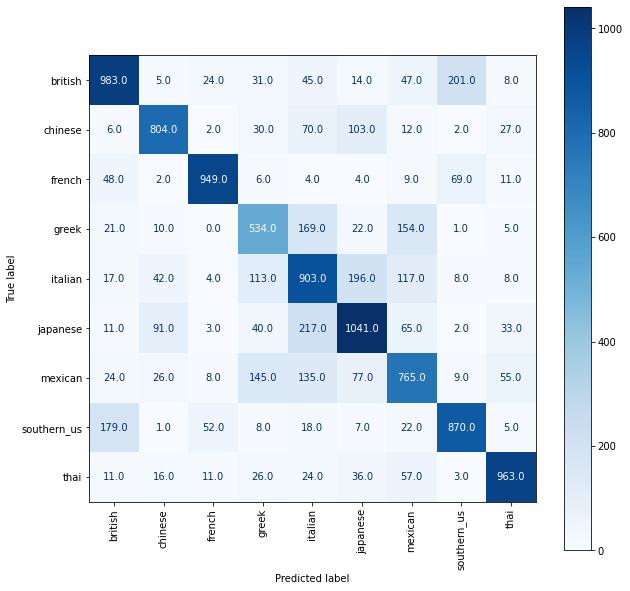

za parametre broj iteracija= 1000 , solver= lbfgs  i pristup  ovr  tacnost je:  0.7139306811052961  a mat. konf. je:


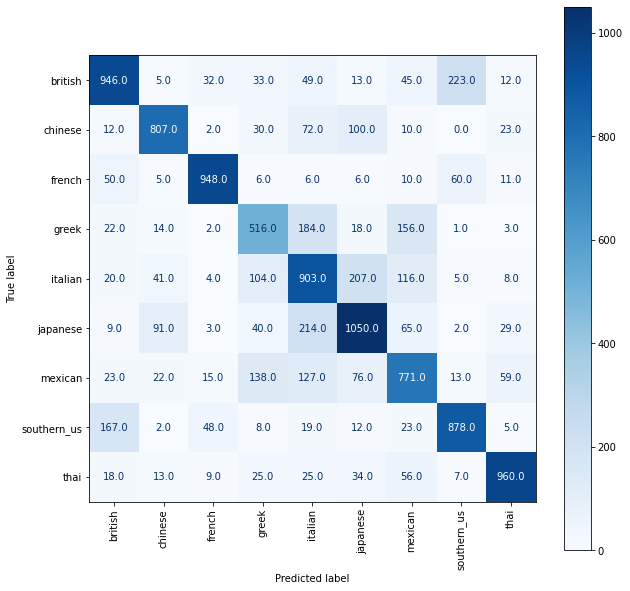

za parametre broj iteracija= 1000 , solver= liblinear  i pristup  auto  tacnost je:  0.714022382121249  a mat. konf. je:


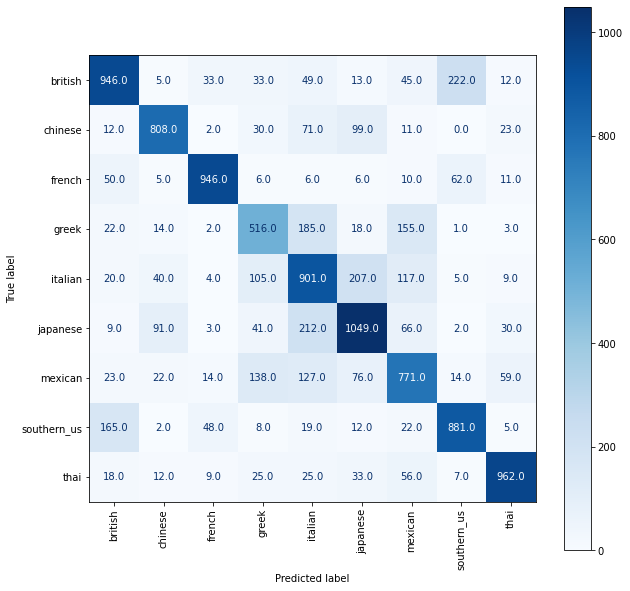

za parametre broj iteracija= 1000 , solver= liblinear  i pristup  ovr  tacnost je:  0.714022382121249  a mat. konf. je:


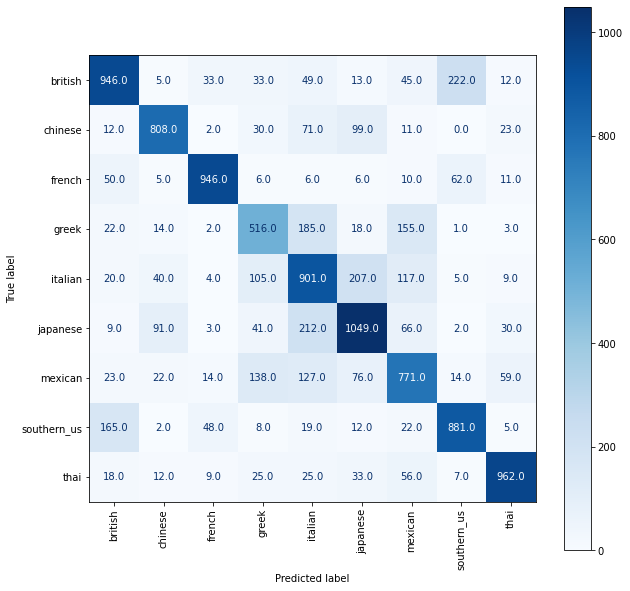

za parametre broj iteracija= 1000 , solver= sag  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


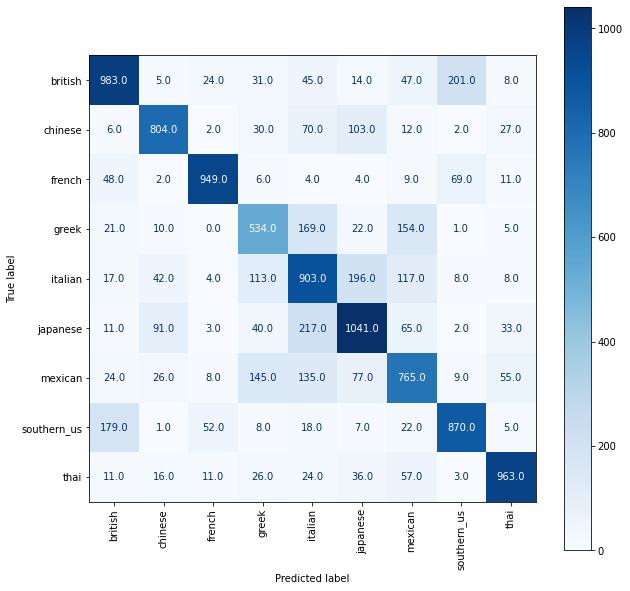

za parametre broj iteracija= 1000 , solver= sag  i pristup  ovr  tacnost je:  0.71383893798603  a mat. konf. je:


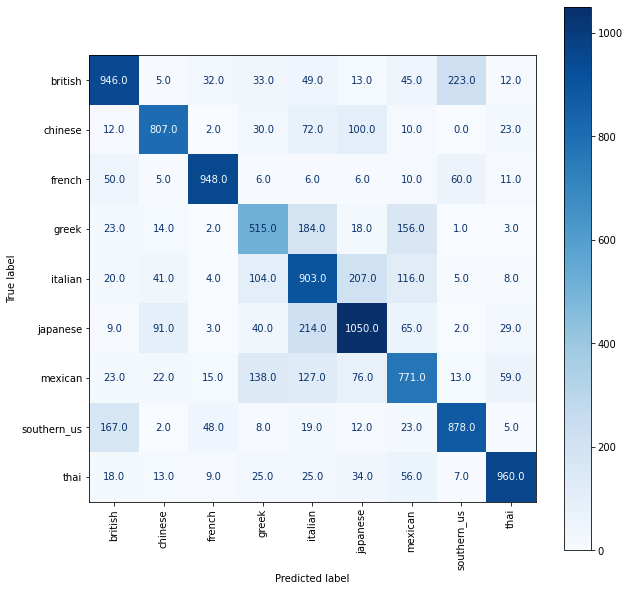

za parametre broj iteracija= 1000 , solver= saga  i pristup  auto  tacnost je:  0.7169593408305299  a mat. konf. je:


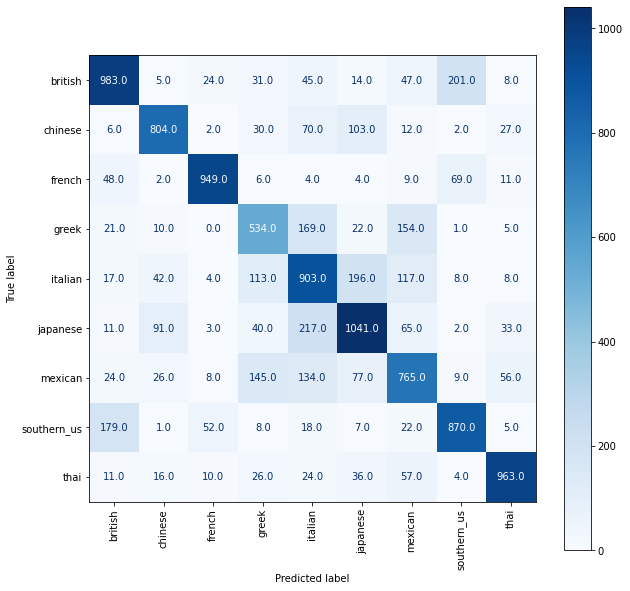

za parametre broj iteracija= 1000 , solver= saga  i pristup  ovr  tacnost je:  0.71383893798603  a mat. konf. je:


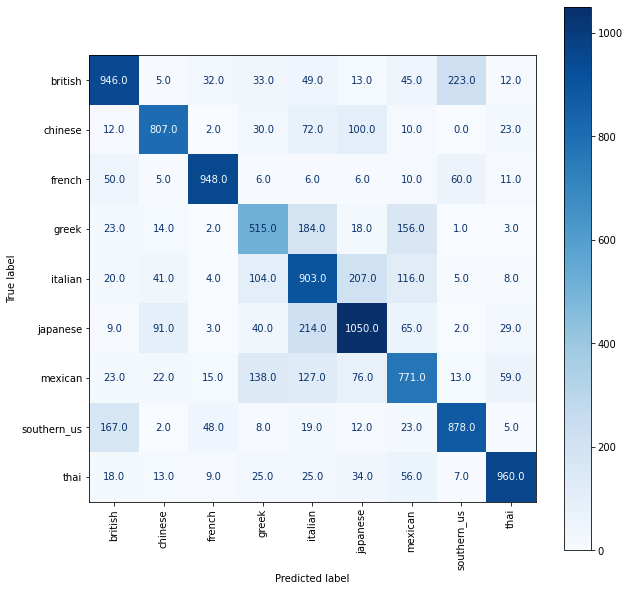

najbolja tacnost tj procenat pogodjenih uzoraka je u iteraciji broj:  0


In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
# petlja po razlicitim vrednostima za max broj iteracija
for num in [100,200,500,1000]:
  # petlja po razlicitim solverima
  for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
      for mc in ['auto', 'ovr']:
        indexes = kf.split(X_undersample, y_undersample)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
        for train_index, val_index in indexes:
            # instancirati objekat klase LogisticRegression sa parametrima max_iter i solver
            classifier = LogisticRegression(max_iter = num, solver = solv, multi_class=mc)
            # obuciti model sa trening skupom
            classifier.fit(X_undersample.iloc[train_index,:], y_undersample.iloc[train_index])
            # izvrsiti predikciju nad validacioni skupom
            y_pred = classifier.predict(X_undersample.iloc[val_index,:])          #ne dobija se za svaku klasu posebno vec samo jedna zdruzena
            acc_tmp.append(accuracy_score(y_undersample.iloc[val_index], y_pred)) #količnik zbira brojeva na glavnoj dijagonali matrice konfuzije i ukupnog broja uzoraka
            #print(confusion_matrix(y_ty_undersamplerain.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat += confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y) #dobijena sabiranjem 5 matrica kofuzije za 5 iteracija
        print('za parametre broj iteracija=', num, ', solver=', solv, ' i pristup ', mc, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        #print(fin_conf_mat)

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
        fig, ax = plt.subplots(figsize=(10,10))
        disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
        plt.show()

        acc.append(np.mean(acc_tmp))
print('najbolja tacnost tj procenat pogodjenih uzoraka je u iteraciji broj: ', np.argmax(acc))


Za konacno odabrane paramentre

tacnost je:  0.7169593408305299  a mat. konf. je:


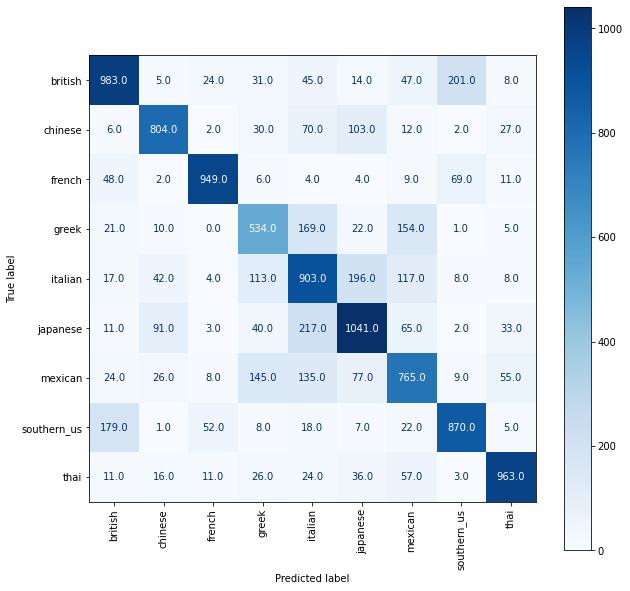

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_undersample, y_undersample)
fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, val_index in indexes:
            classifier = LogisticRegression(max_iter = 100, solver = 'newton-cg', multi_class='auto')
            classifier.fit(X_undersample.iloc[train_index,:], y_undersample.iloc[train_index])
            y_pred = classifier.predict(X_undersample.iloc[val_index,:])

            acc_tmp.append(accuracy_score(y_undersample.iloc[val_index], y_pred))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat += confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y)
            acc_tmp.append(accuracy_score(y_undersample.iloc[val_index], y_pred))

            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

       


funkcija koja na osnovu matrice konfuzije računa tačnost klasifikatora po klasi i prosečnu tačnost.

In [ ]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

In [ ]:
niz=['british', 'chinese', 'french', 'greek', 'italian', 'japanese','mexican', 'southern_us', 'thai']

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat, niz))

Za klasu  british  tacnost je:  0.9364904552129222
Za klasu  chinese  tacnost je:  0.9591593245227606
Za klasu  french  tacnost je:  0.9764133627019089
Za klasu  greek  tacnost je:  0.9283223201174743
Za klasu  italian  tacnost je:  0.89106093979442
Za klasu  japanese  tacnost je:  0.9154735682819384
Za klasu  mexican  tacnost je:  0.9117107195301027
Za klasu  southern_us  tacnost je:  0.9461270190895742
Za klasu  thai  tacnost je:  0.9691629955947136
prosecna tacnost je:  0.9371023005384238


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, niz))

Za klasu  british  osetljivost je:  0.7238586156111929
Za klasu  chinese  osetljivost je:  0.7613636363636364
Za klasu  french  osetljivost je:  0.8611615245009074
Za klasu  greek  osetljivost je:  0.5829694323144105
Za klasu  italian  osetljivost je:  0.6413352272727273
Za klasu  japanese  osetljivost je:  0.6926147704590818
Za klasu  mexican  osetljivost je:  0.614951768488746
Za klasu  southern_us  osetljivost je:  0.7487091222030982
Za klasu  thai  osetljivost je:  0.8395815170008718
prosecna osetljivost je:  0.7185050682460746


Obuka finalnog modela

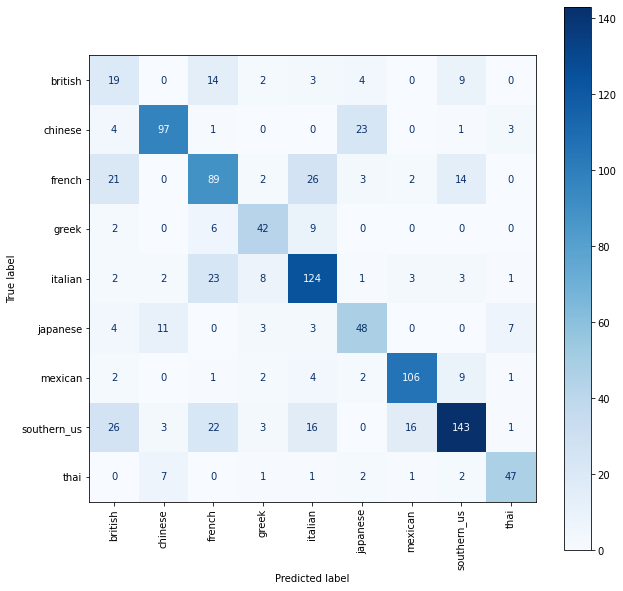

In [ ]:
classifier_logReg = LogisticRegression(max_iter = 100, solver = 'newton-cg', multi_class='auto')
classifier_logReg.fit(X_undersample, y_undersample)
y_pred = classifier_logReg.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classifier_logReg.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

OSETLJIVOST

In [ ]:
def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat, niz))

Za klasu  british  osetljivost je:  0.37254901960784315
Za klasu  chinese  osetljivost je:  0.751937984496124
Za klasu  french  osetljivost je:  0.5668789808917197
Za klasu  greek  osetljivost je:  0.711864406779661
Za klasu  italian  osetljivost je:  0.7425149700598802
Za klasu  japanese  osetljivost je:  0.631578947368421
Za klasu  mexican  osetljivost je:  0.8346456692913385
Za klasu  southern_us  osetljivost je:  0.6217391304347826
Za klasu  thai  osetljivost je:  0.7704918032786885
prosecna osetljivost je:  0.6671334346898288


SPECIFICNOST

In [ ]:
def specificnost_po_klasi(mat_konf, klase):
    specificnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        FP = sum(mat_konf[j,i])
        specificnost_i.append(TN/(TN+FP))
        print('Za klasu ', klase[i], ' specificnost je: ', specificnost_i[i])
    specificnost_avg = np.mean(specificnost_i)
    return specificnost_avg

In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat, niz))

Za klasu  british  specificnost je:  0.9393638170974155
Za klasu  chinese  specificnost je:  0.9752155172413793
Za klasu  french  specificnost je:  0.9255555555555556
Za klasu  greek  specificnost je:  0.9789579158316634
Za klasu  italian  specificnost je:  0.9303370786516854
Za klasu  japanese  specificnost je:  0.9643221202854231
Za klasu  mexican  specificnost je:  0.9763440860215054
Za klasu  southern_us  specificnost je:  0.9540507859733979
Za klasu  thai  specificnost je:  0.9869477911646586
prosecna specificnost je:  0.9590105186469648


PRECIZNOST

In [ ]:
def preciznost_po_klasi(mat_konf, klase):
    preciznost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FP = sum(mat_konf[j,i])
        preciznost_i.append(TP/(TP+FP))
        print('Za klasu ', klase[i], ' preciznost je: ', preciznost_i[i])
    preciznost_avg = np.mean(preciznost_i)
    return preciznost_avg

In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat, niz))

Za klasu  british  preciznost je:  0.2375
Za klasu  chinese  preciznost je:  0.8083333333333333
Za klasu  french  preciznost je:  0.5705128205128205
Za klasu  greek  preciznost je:  0.6666666666666666
Za klasu  italian  preciznost je:  0.6666666666666666
Za klasu  japanese  preciznost je:  0.5783132530120482
Za klasu  mexican  preciznost je:  0.828125
Za klasu  southern_us  preciznost je:  0.7900552486187845
Za klasu  thai  preciznost je:  0.7833333333333333
prosecna preciznost je:  0.6588340357937392


TACNOST

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat, niz)) #NE RAZUMEM STA JE OVO A STA OVO DOLE, A STA ONA TACNOST KOD BIRANJA PARAMETARA

Za klasu  british  tacnost je:  0.9120151371807
Za klasu  chinese  tacnost je:  0.9479659413434248
Za klasu  french  tacnost je:  0.8722800378429517
Za klasu  greek  tacnost je:  0.9640491958372753
Za klasu  italian  tacnost je:  0.9006622516556292
Za klasu  japanese  tacnost je:  0.9403973509933775
Za klasu  mexican  tacnost je:  0.9593188268684958
Za klasu  southern_us  tacnost je:  0.8817407757805109
Za klasu  thai  tacnost je:  0.9744560075685903
prosecna tacnost je:  0.9280983916745507


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print(labels_y)

procenat pogodjenih uzoraka:  0.6764427625354777
preciznost mikro:  0.6764427625354777
preciznost makro:  0.6588340357937392
osetljivost mikro:  0.6764427625354777
osetljivost makro:  0.6671334346898288
f mera mikro:  0.6764427625354777
f mera makro:  0.659647383093206
['japanese' 'greek' 'thai' 'british' 'french' 'italian' 'southern_us'
 'chinese' 'mexican']


In [ ]:
wrong_prediction= y_test!=y_pred

print('procenat sigurnosti u pogresnim: ', classifier_logReg.predict_proba(X_test.loc[wrong_prediction,:]).max(axis=1).mean())
print('prosecno siguran u ispravnim: ', classifier_logReg.predict_proba(X_test.loc[~wrong_prediction,:]).max(axis=1).mean())

procenat sigurnosti u pogresnim:  0.5453421753357865
prosecno siguran u ispravnim:  0.7740895893257329


SVM!!!!

za parametre C= 1 , kernel= linear  i pristup  ovo  tacnost je:  0.7158591391556601  a mat. konf. je:


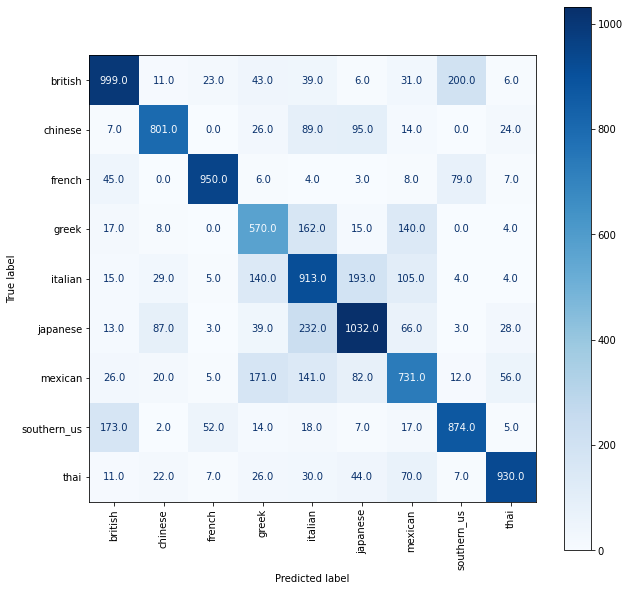

za parametre C= 1 , kernel= linear  i pristup  ovr  tacnost je:  0.7158591391556601  a mat. konf. je:


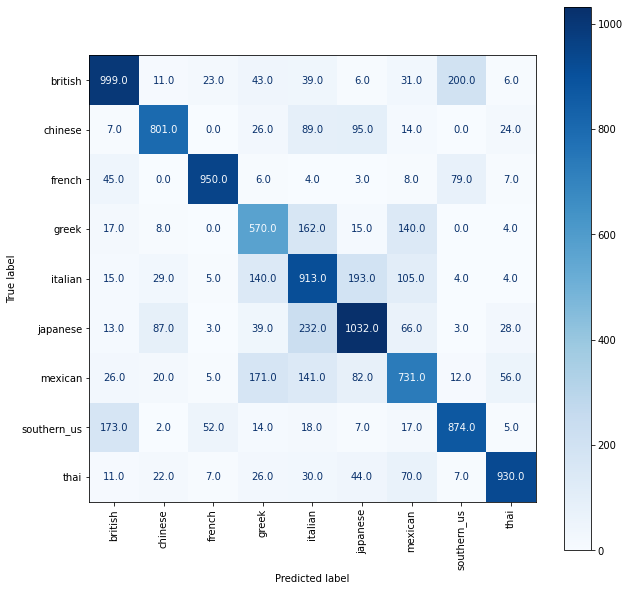

za parametre C= 1 , kernel= poly  i pristup  ovo  tacnost je:  0.7465116984055475  a mat. konf. je:


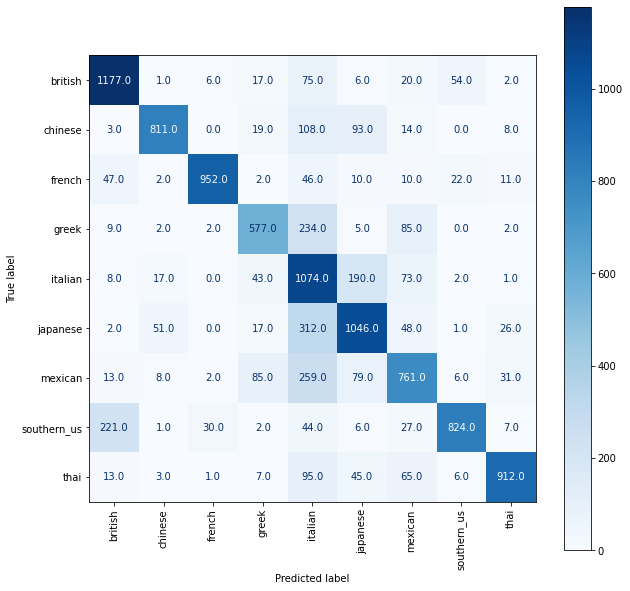

za parametre C= 1 , kernel= poly  i pristup  ovr  tacnost je:  0.7465116984055475  a mat. konf. je:


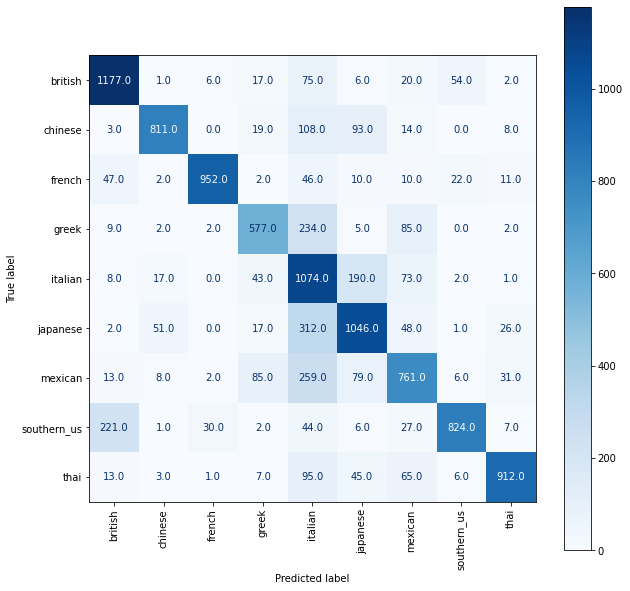

za parametre C= 1 , kernel= rbf  i pristup  ovo  tacnost je:  0.7649589282180614  a mat. konf. je:


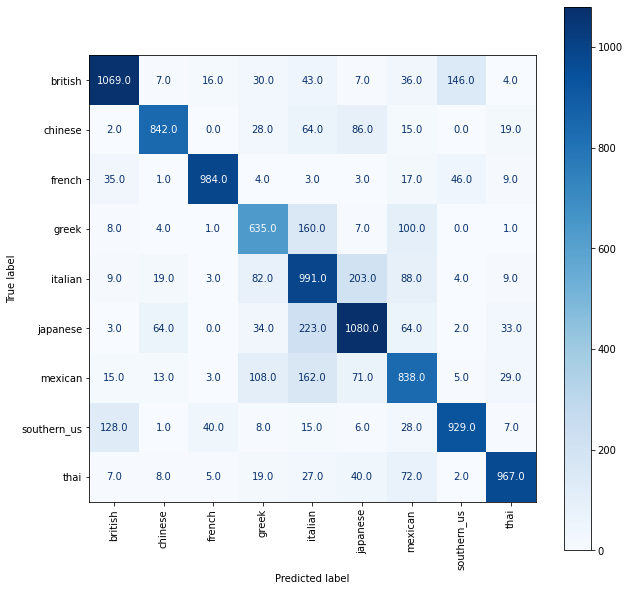

za parametre C= 1 , kernel= rbf  i pristup  ovr  tacnost je:  0.7649589282180614  a mat. konf. je:


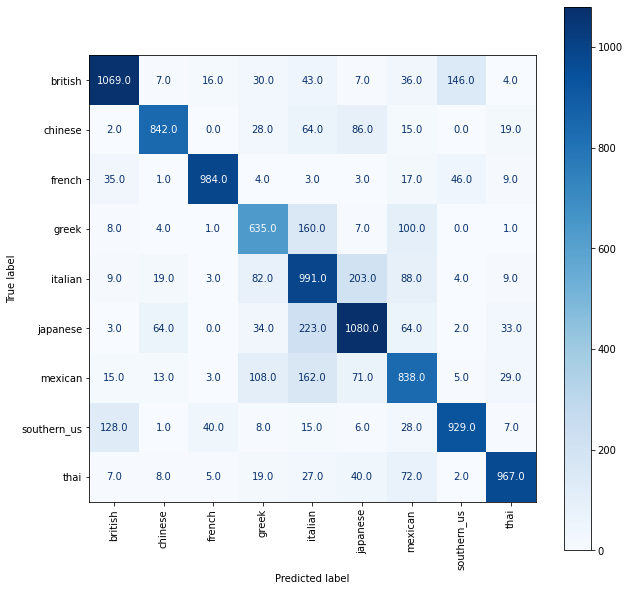

za parametre C= 1 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.6378485207000939  a mat. konf. je:


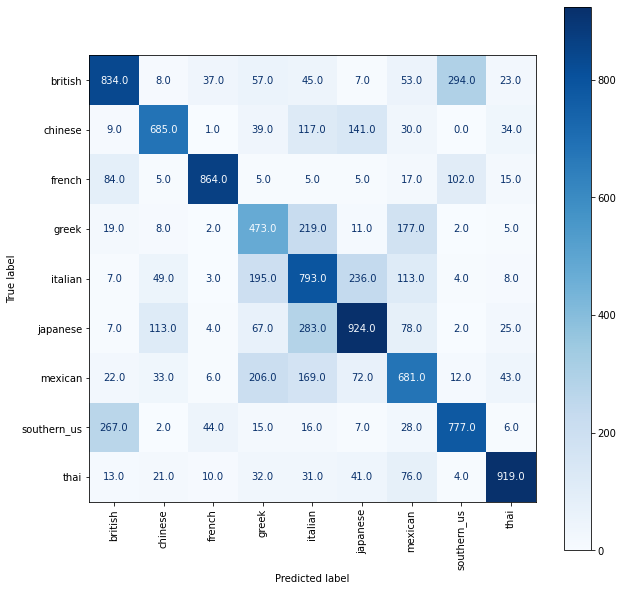

za parametre C= 1 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.6378485207000939  a mat. konf. je:


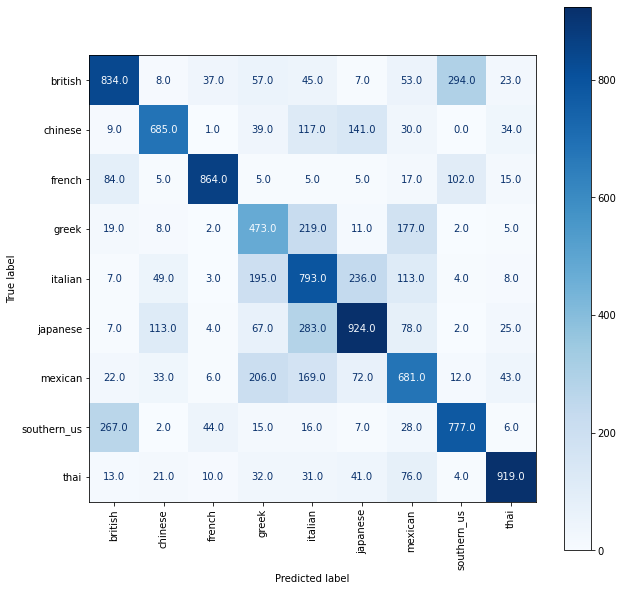

za parametre C= 5 , kernel= linear  i pristup  ovo  tacnost je:  0.7181537697201392  a mat. konf. je:


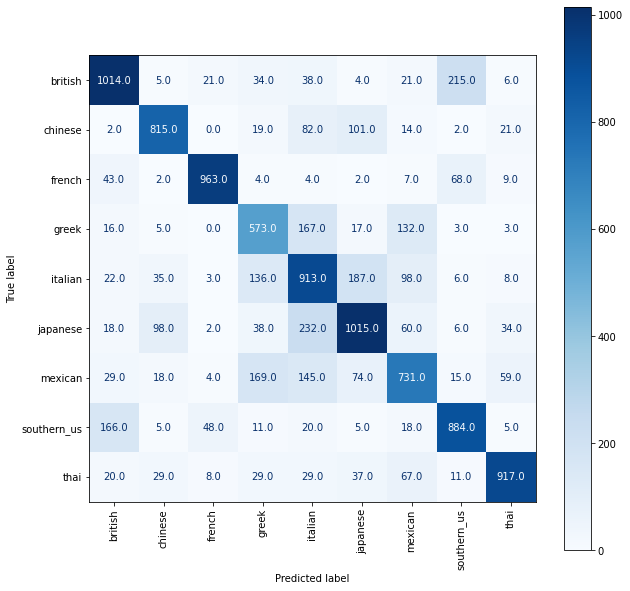

za parametre C= 5 , kernel= linear  i pristup  ovr  tacnost je:  0.7181537697201392  a mat. konf. je:


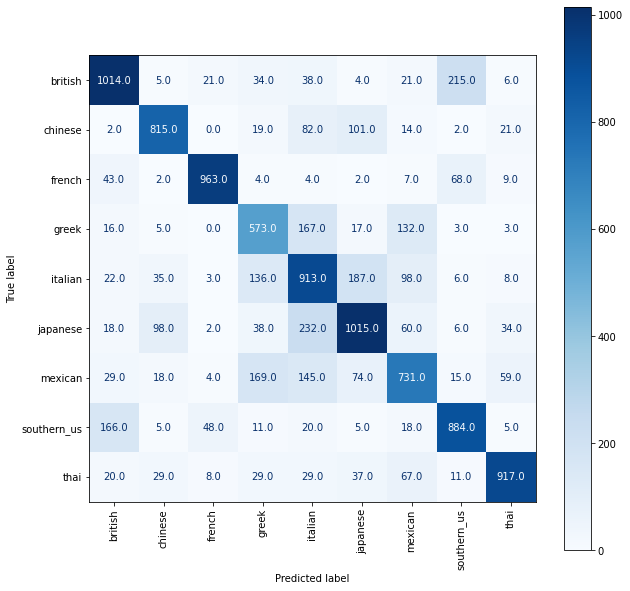

za parametre C= 5 , kernel= poly  i pristup  ovo  tacnost je:  0.7937779723886472  a mat. konf. je:


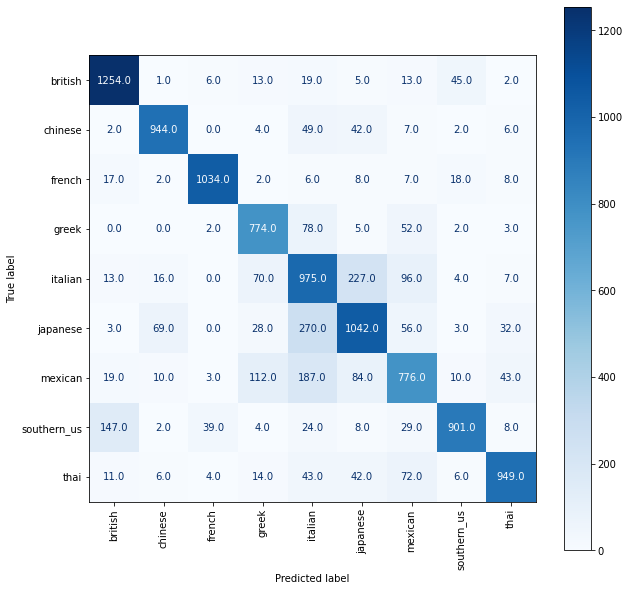

za parametre C= 5 , kernel= poly  i pristup  ovr  tacnost je:  0.7937779723886472  a mat. konf. je:


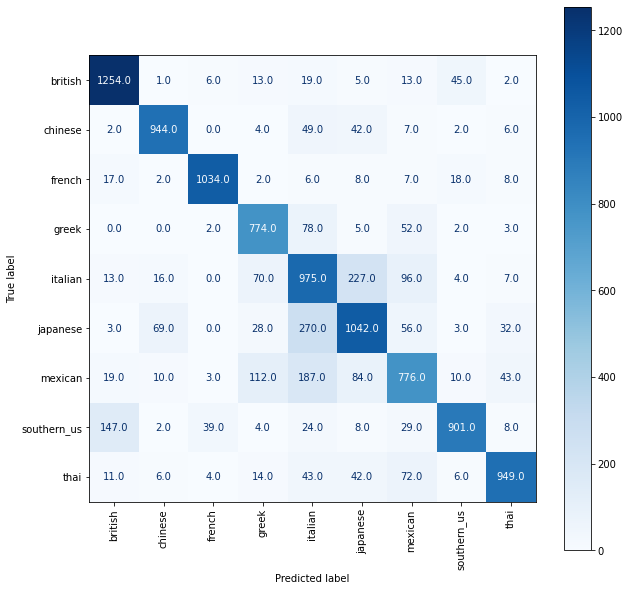

za parametre C= 5 , kernel= rbf  i pristup  ovo  tacnost je:  0.8091040414970253  a mat. konf. je:


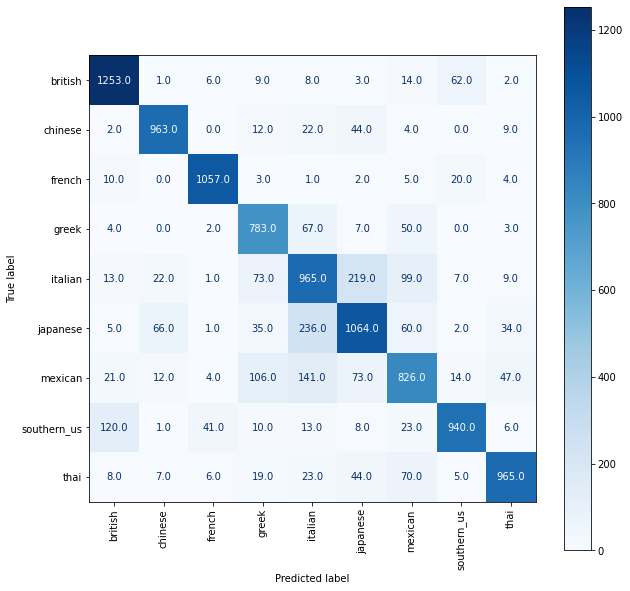

za parametre C= 5 , kernel= rbf  i pristup  ovr  tacnost je:  0.8091040414970253  a mat. konf. je:


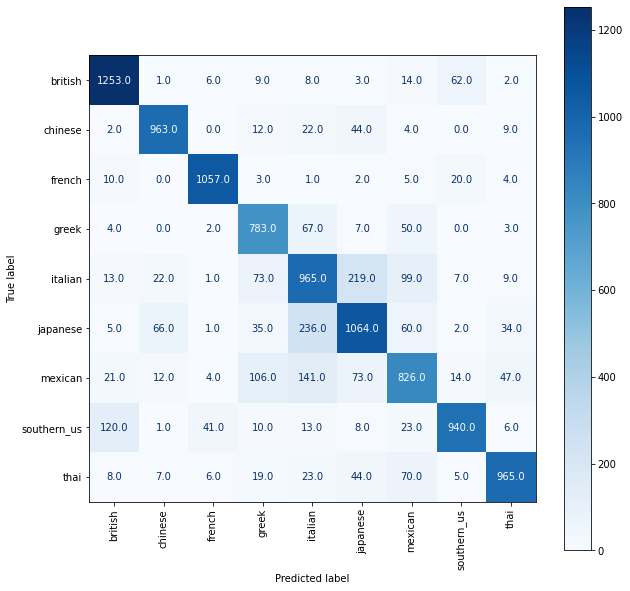

za parametre C= 5 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.5928791087570682  a mat. konf. je:


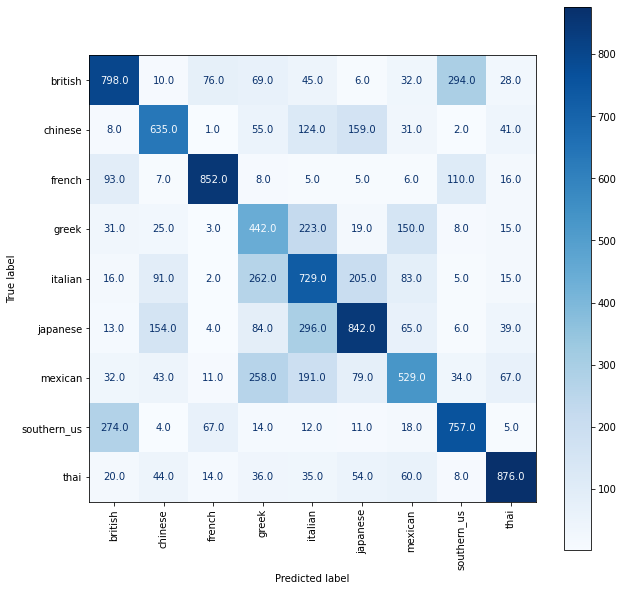

za parametre C= 5 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.5928791087570682  a mat. konf. je:


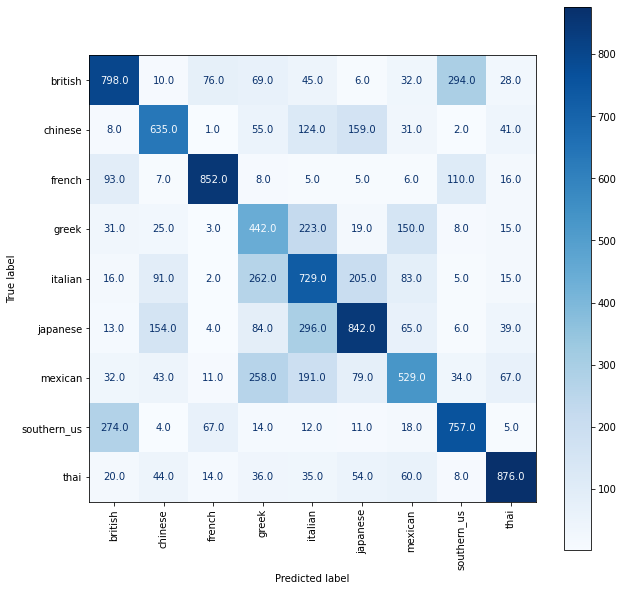

za parametre C= 10 , kernel= linear  i pristup  ovo  tacnost je:  0.7176945067807387  a mat. konf. je:


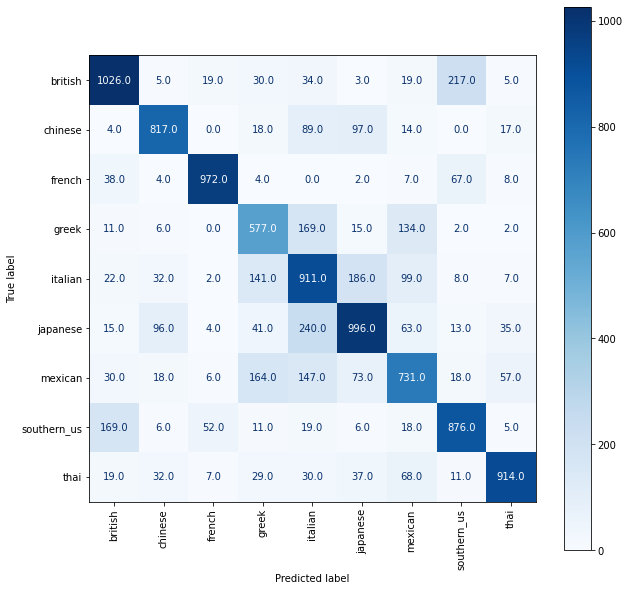

za parametre C= 10 , kernel= linear  i pristup  ovr  tacnost je:  0.7176945067807387  a mat. konf. je:


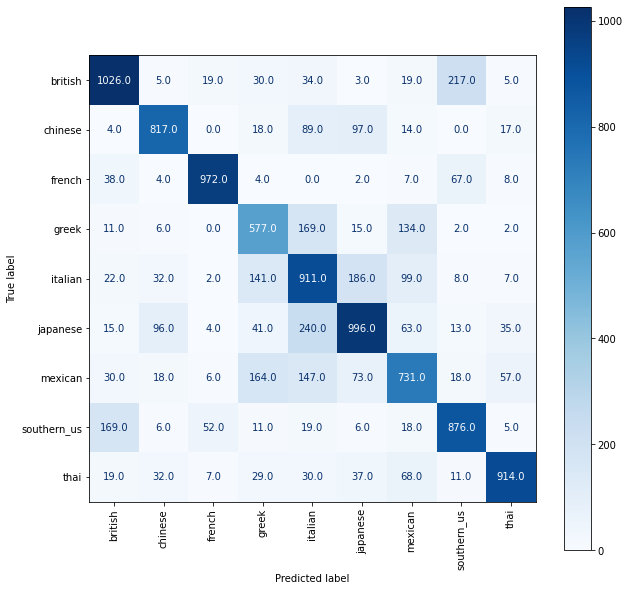

za parametre C= 10 , kernel= poly  i pristup  ovo  tacnost je:  0.801119863922092  a mat. konf. je:


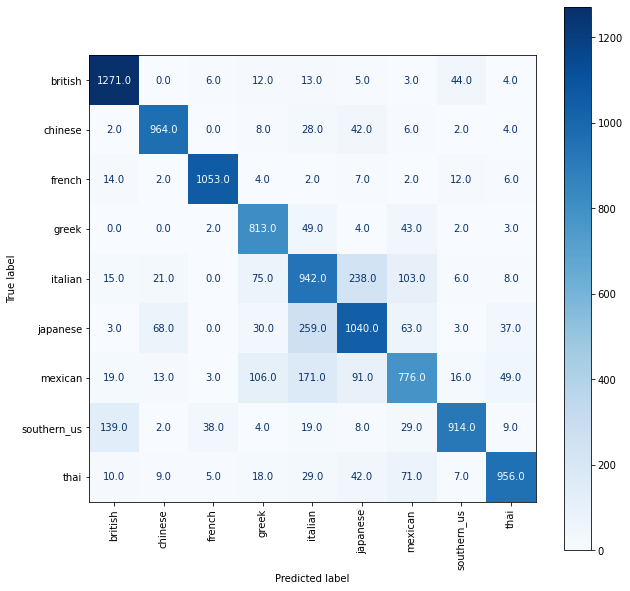

za parametre C= 10 , kernel= poly  i pristup  ovr  tacnost je:  0.801119863922092  a mat. konf. je:


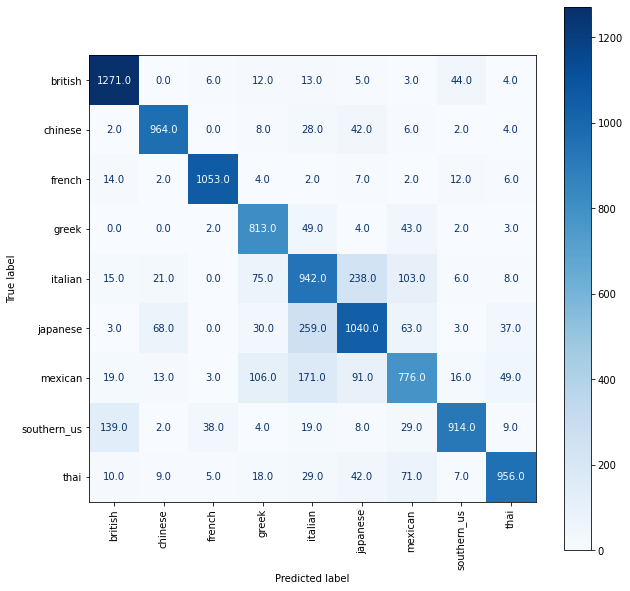

za parametre C= 10 , kernel= rbf  i pristup  ovo  tacnost je:  0.8110311101380567  a mat. konf. je:


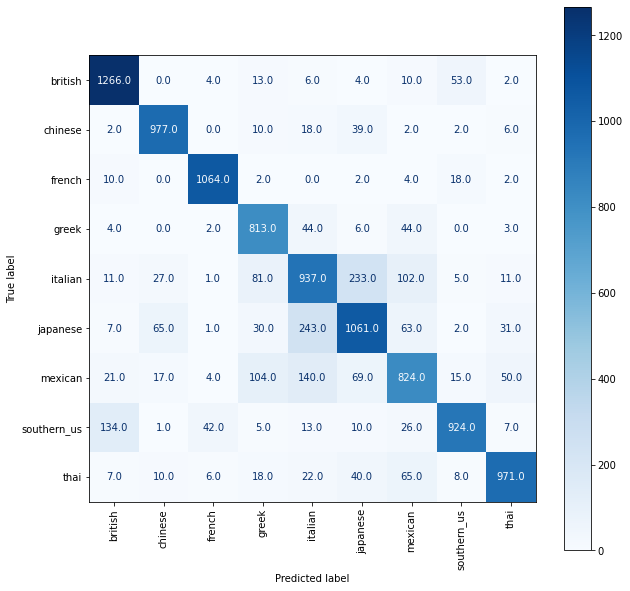

za parametre C= 10 , kernel= rbf  i pristup  ovr  tacnost je:  0.8110311101380567  a mat. konf. je:


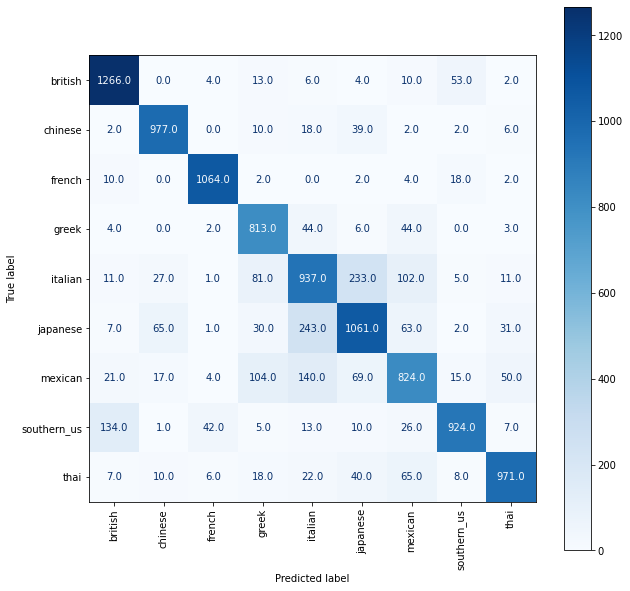

za parametre C= 10 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.5825995848613328  a mat. konf. je:


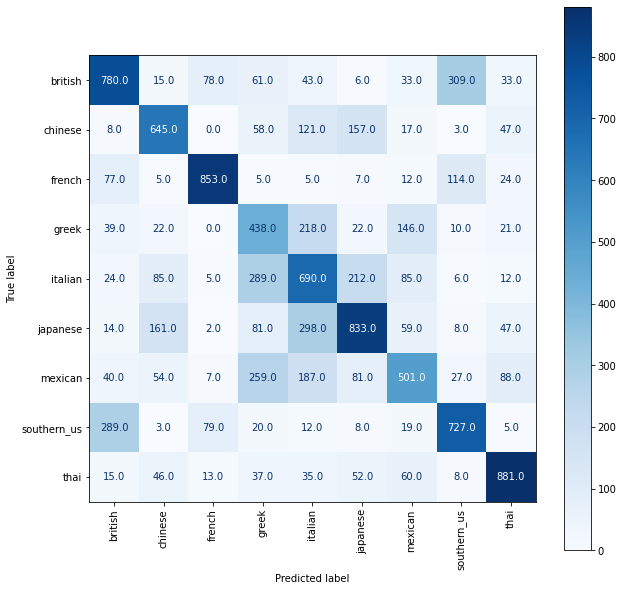

za parametre C= 10 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.5825995848613328  a mat. konf. je:


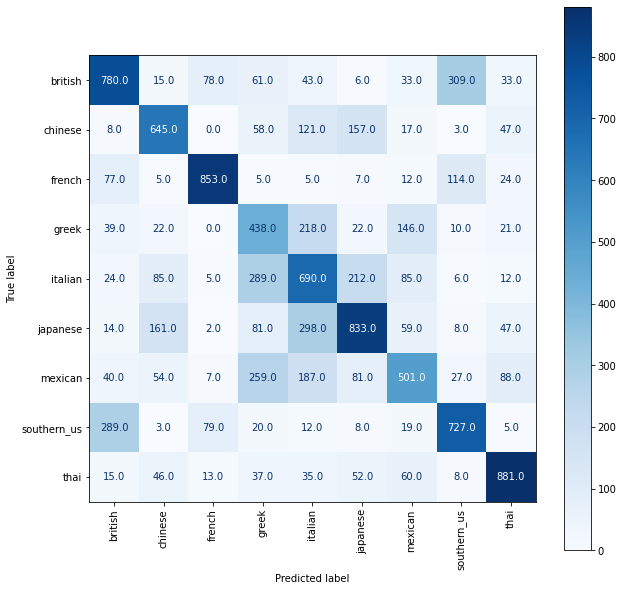

za parametre C= 20 , kernel= linear  i pristup  ovo  tacnost je:  0.7189793735869074  a mat. konf. je:


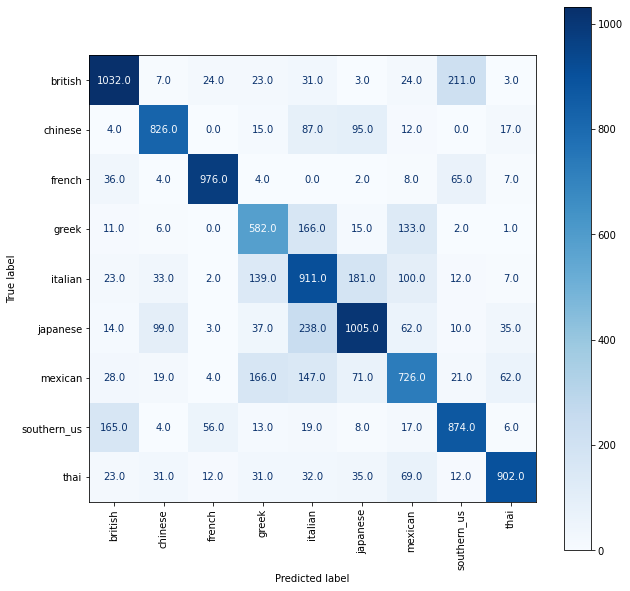

za parametre C= 20 , kernel= linear  i pristup  ovr  tacnost je:  0.7189793735869074  a mat. konf. je:


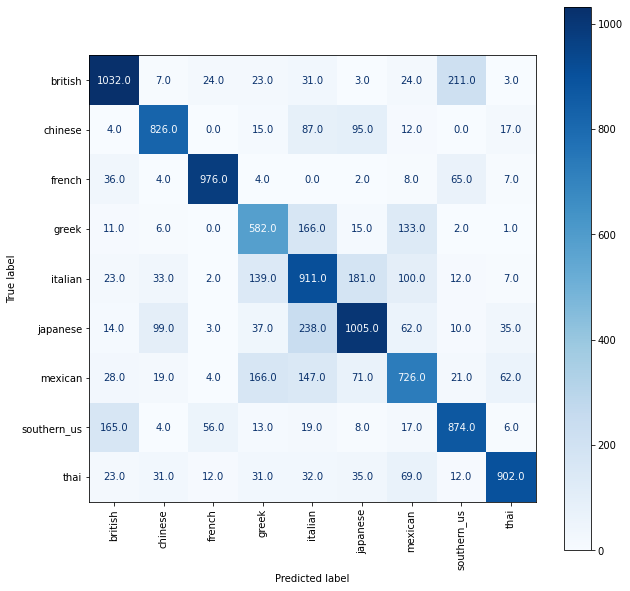

za parametre C= 20 , kernel= poly  i pristup  ovo  tacnost je:  0.7979995873875316  a mat. konf. je:


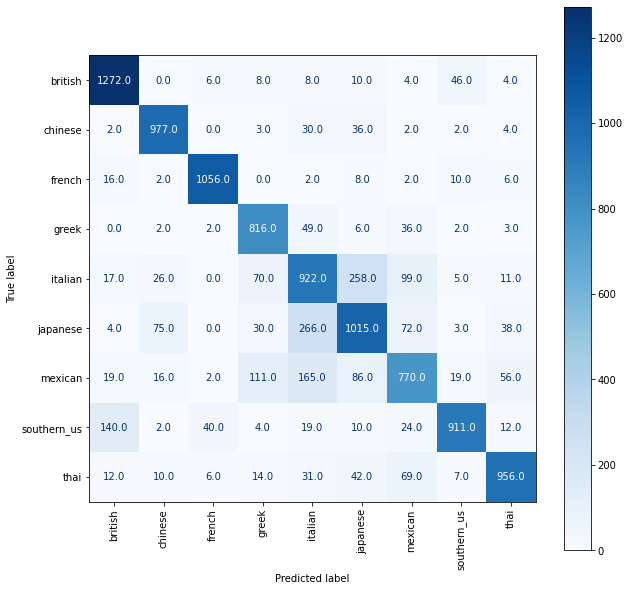

za parametre C= 20 , kernel= poly  i pristup  ovr  tacnost je:  0.7979995873875316  a mat. konf. je:


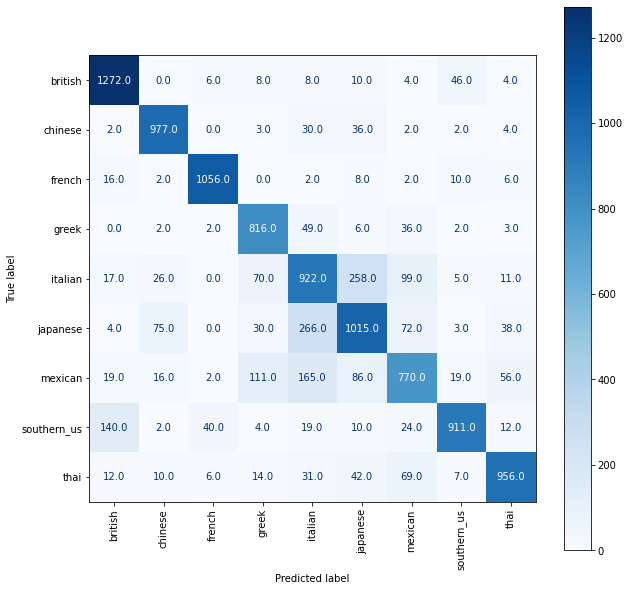

za parametre C= 20 , kernel= rbf  i pristup  ovo  tacnost je:  0.8105724787483528  a mat. konf. je:


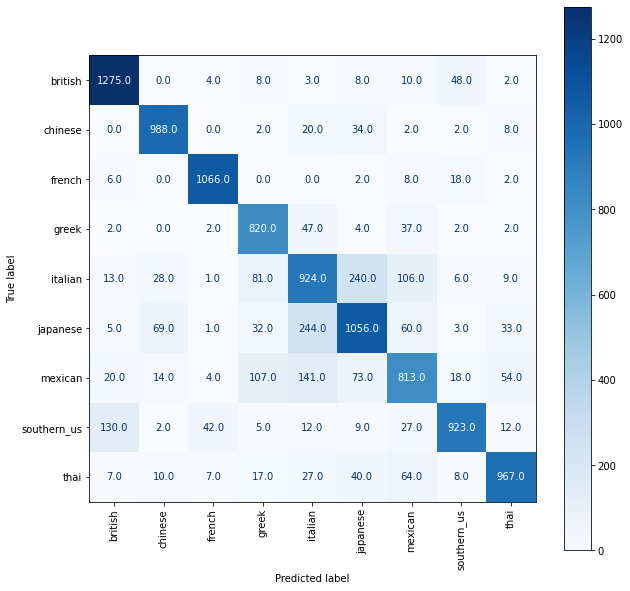

za parametre C= 20 , kernel= rbf  i pristup  ovr  tacnost je:  0.8105724787483528  a mat. konf. je:


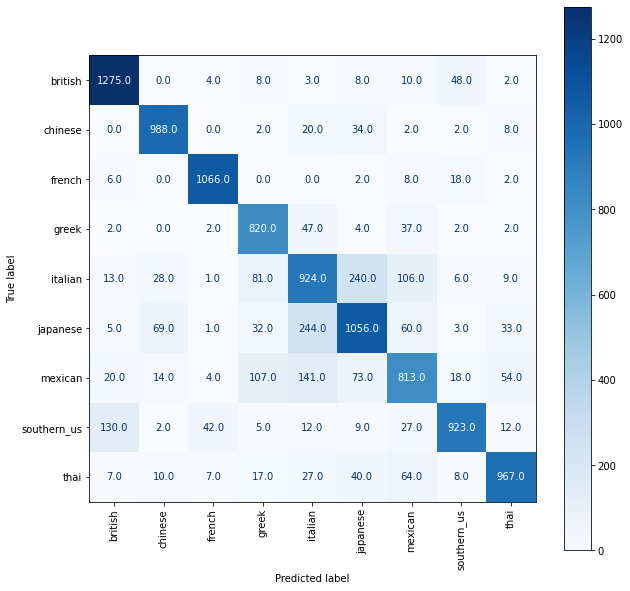

za parametre C= 20 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.5860862023232608  a mat. konf. je:


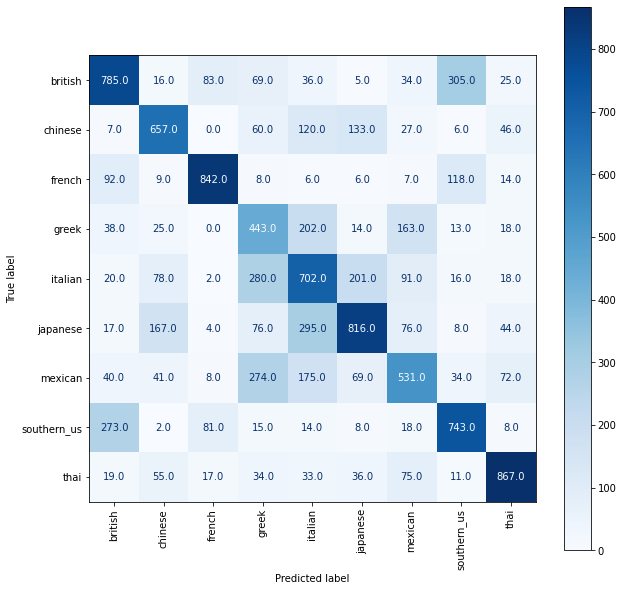

za parametre C= 20 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.5860862023232608  a mat. konf. je:


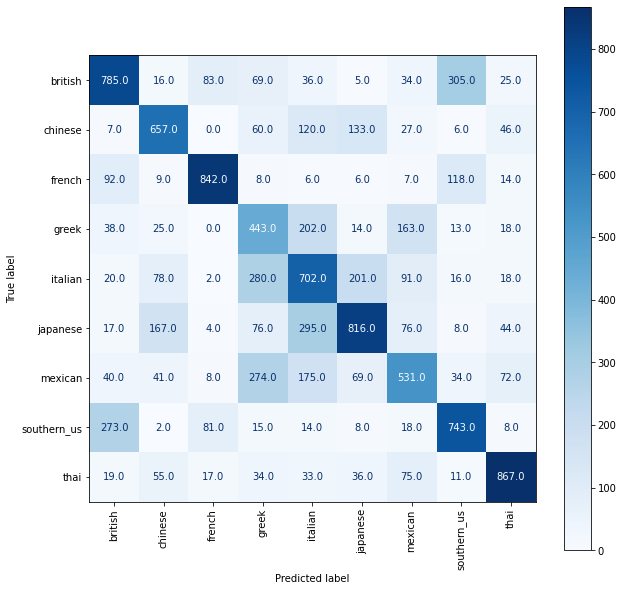

za parametre C= 50 , kernel= linear  i pristup  ovo  tacnost je:  0.7183370454421059  a mat. konf. je:


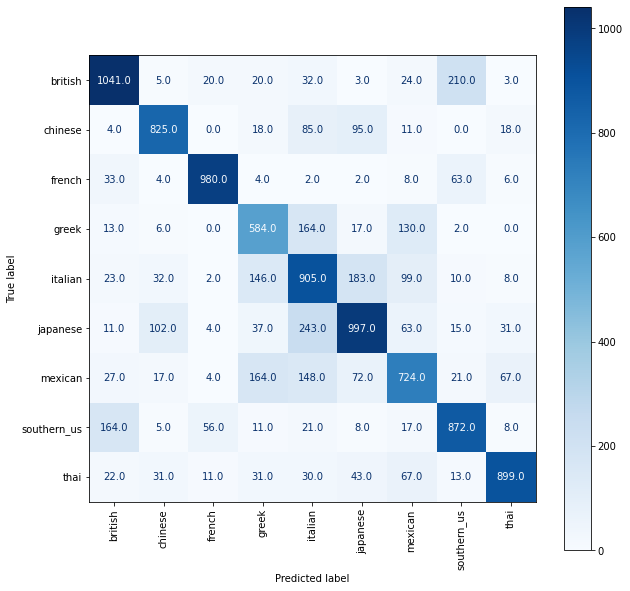

za parametre C= 50 , kernel= linear  i pristup  ovr  tacnost je:  0.7183370454421059  a mat. konf. je:


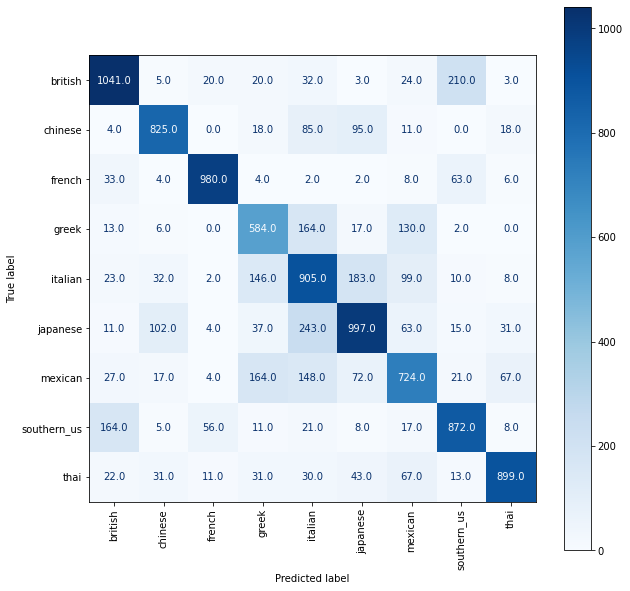

za parametre C= 50 , kernel= poly  i pristup  ovo  tacnost je:  0.7949709276622978  a mat. konf. je:


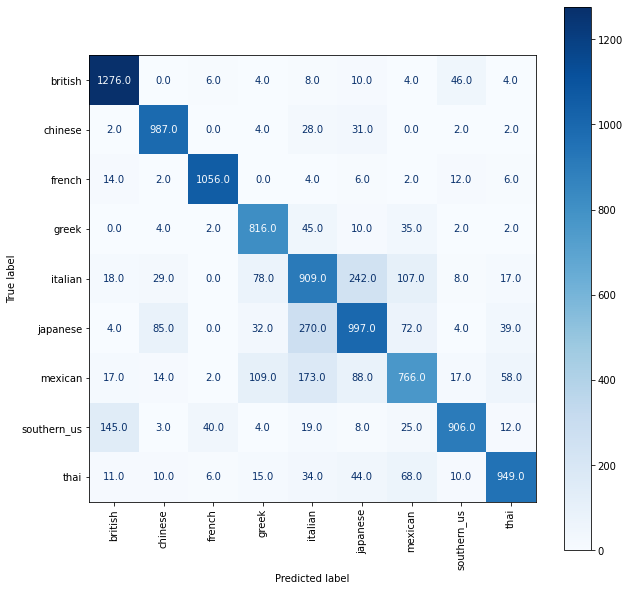

za parametre C= 50 , kernel= poly  i pristup  ovr  tacnost je:  0.7949709276622978  a mat. konf. je:


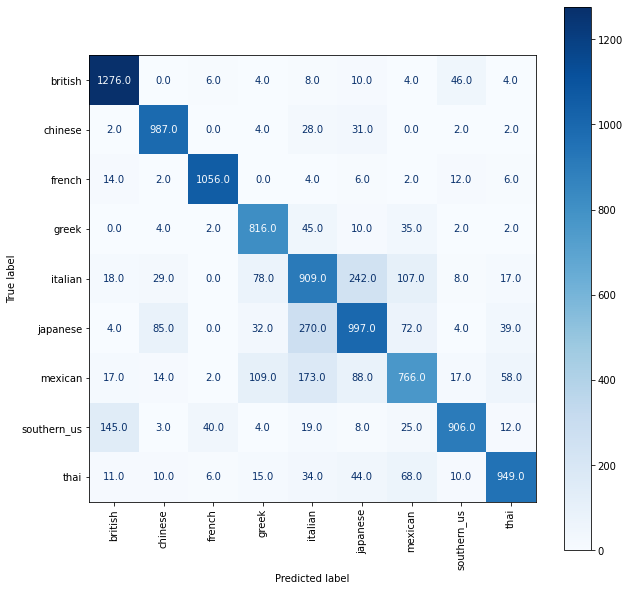

za parametre C= 50 , kernel= rbf  i pristup  ovo  tacnost je:  0.8091045046334695  a mat. konf. je:


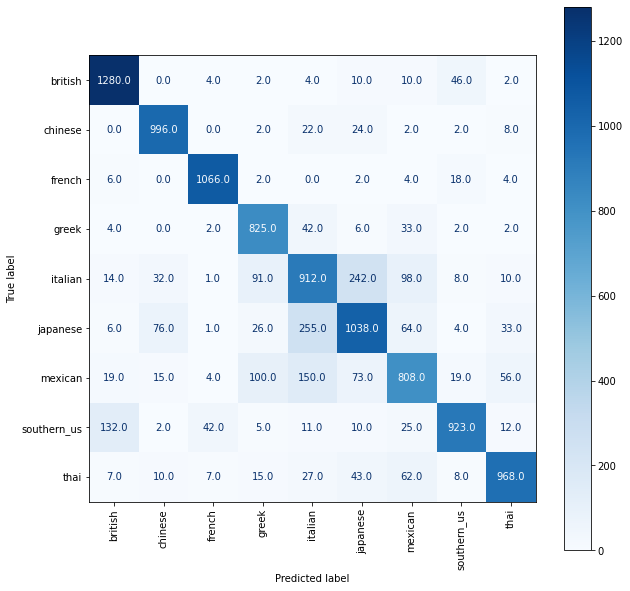

za parametre C= 50 , kernel= rbf  i pristup  ovr  tacnost je:  0.8091045046334695  a mat. konf. je:


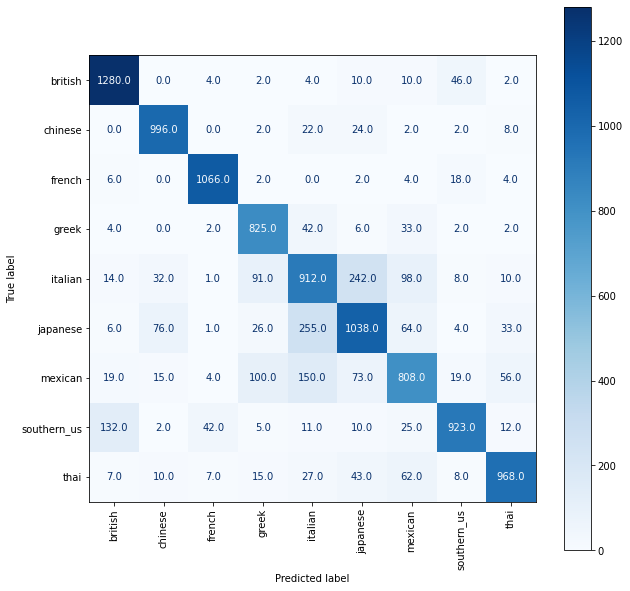

za parametre C= 50 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.5779192963694313  a mat. konf. je:


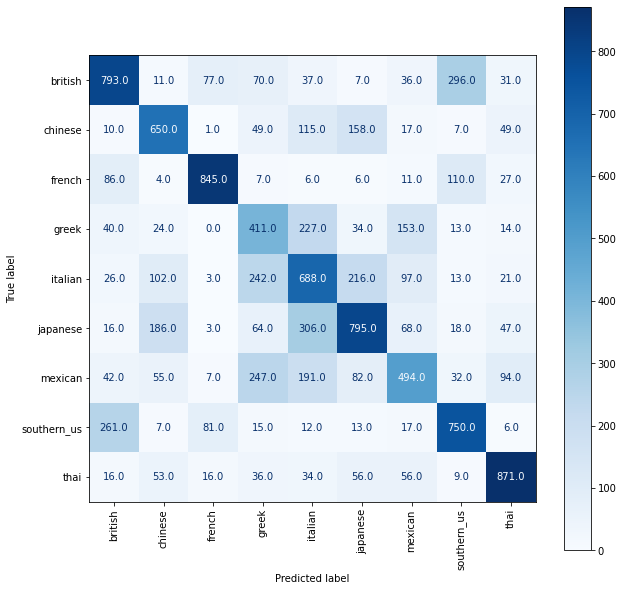

za parametre C= 50 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.5779192963694313  a mat. konf. je:


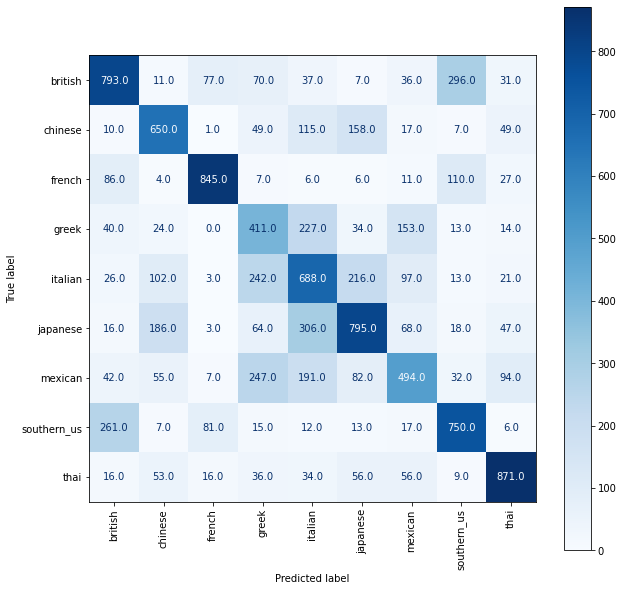

za parametre C= 100 , kernel= linear  i pristup  ovo  tacnost je:  0.7198968047795681  a mat. konf. je:


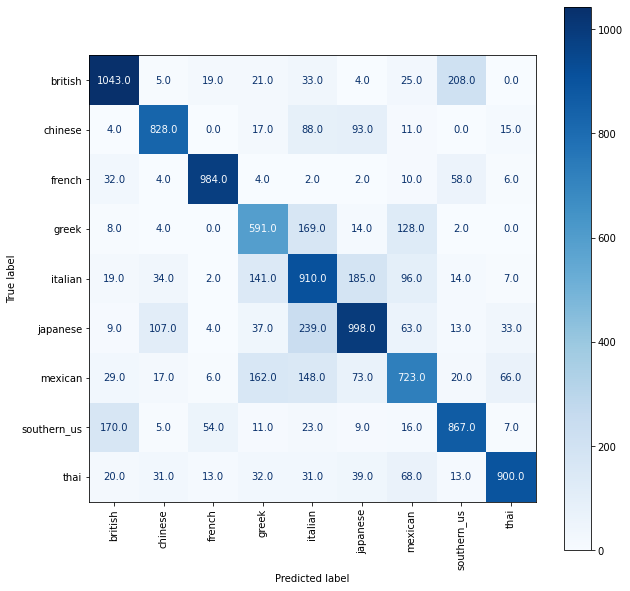

za parametre C= 100 , kernel= linear  i pristup  ovr  tacnost je:  0.7198968047795681  a mat. konf. je:


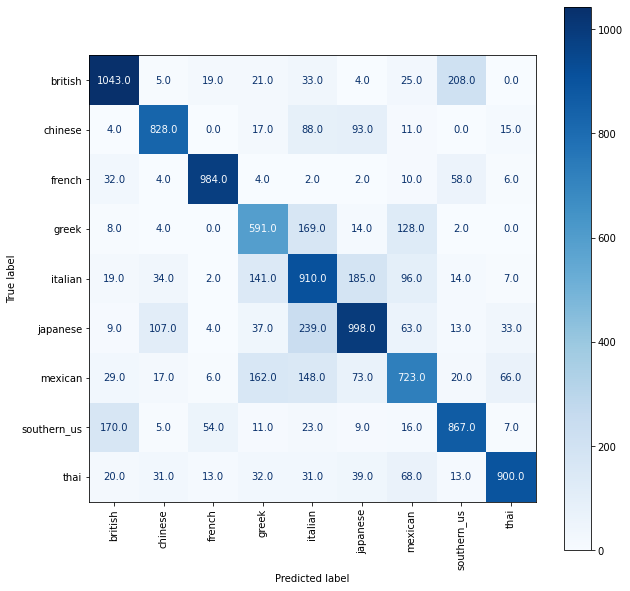

za parametre C= 100 , kernel= poly  i pristup  ovo  tacnost je:  0.7950625444716245  a mat. konf. je:


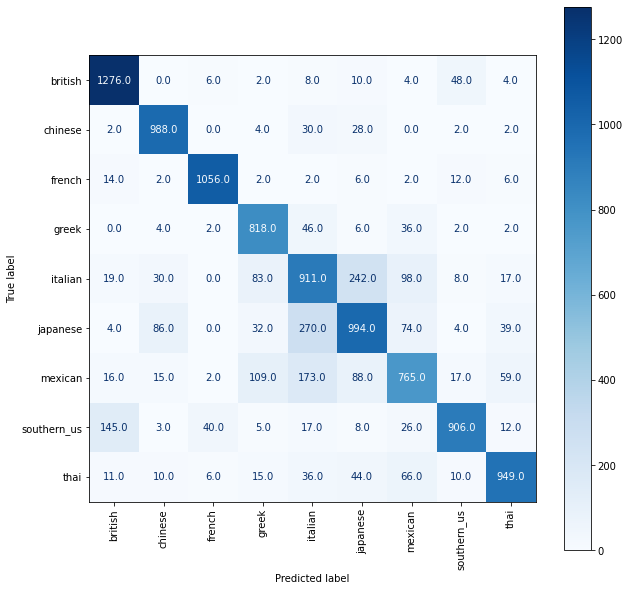

za parametre C= 100 , kernel= poly  i pristup  ovr  tacnost je:  0.7950625444716245  a mat. konf. je:


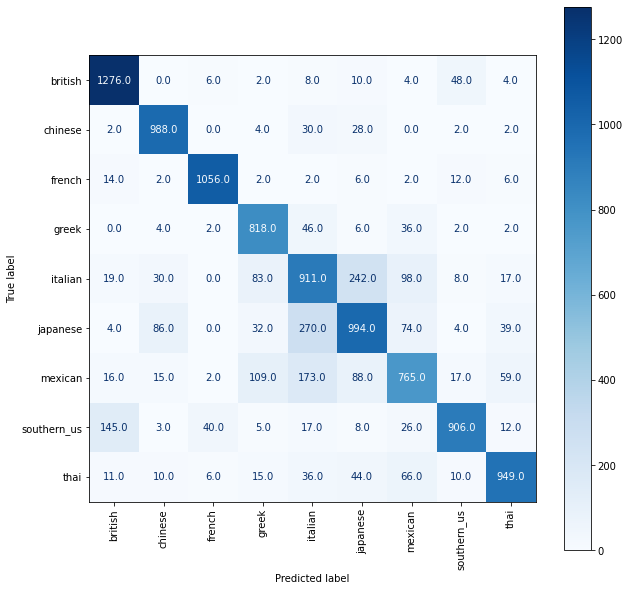

za parametre C= 100 , kernel= rbf  i pristup  ovo  tacnost je:  0.8071771833725595  a mat. konf. je:


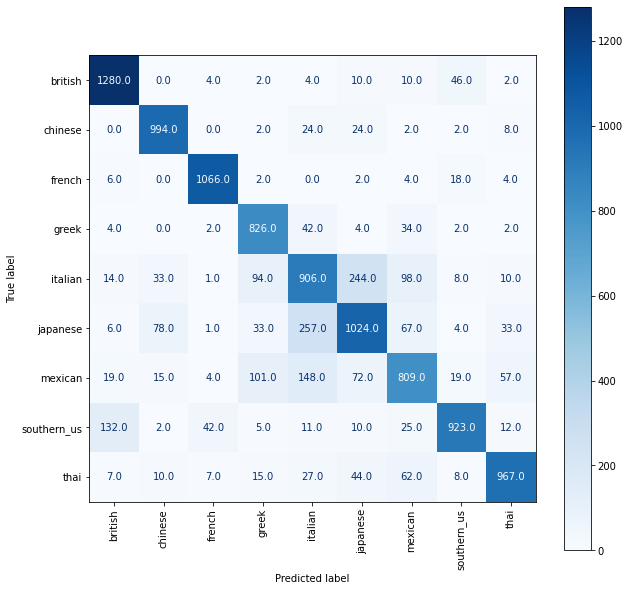

za parametre C= 100 , kernel= rbf  i pristup  ovr  tacnost je:  0.8071771833725595  a mat. konf. je:


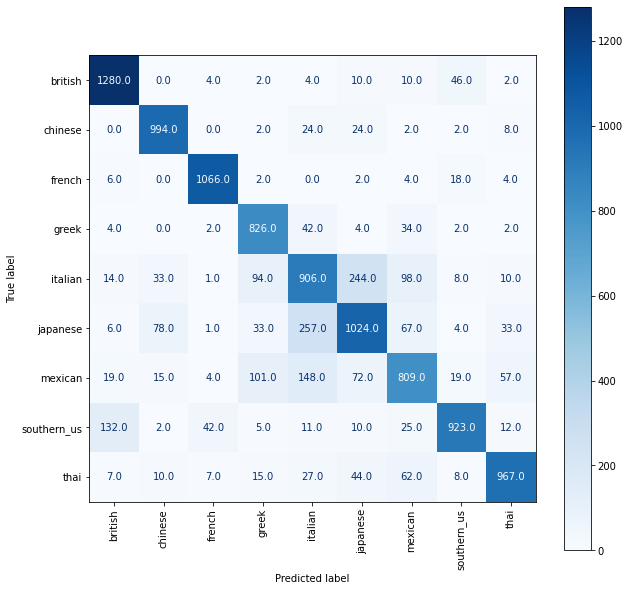

za parametre C= 100 , kernel= sigmoid  i pristup  ovo  tacnost je:  0.5798466597336545  a mat. konf. je:


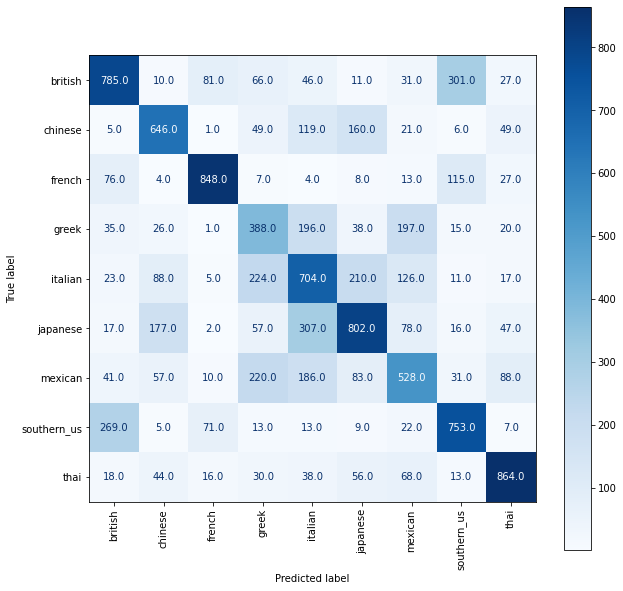

za parametre C= 100 , kernel= sigmoid  i pristup  ovr  tacnost je:  0.5798466597336545  a mat. konf. je:


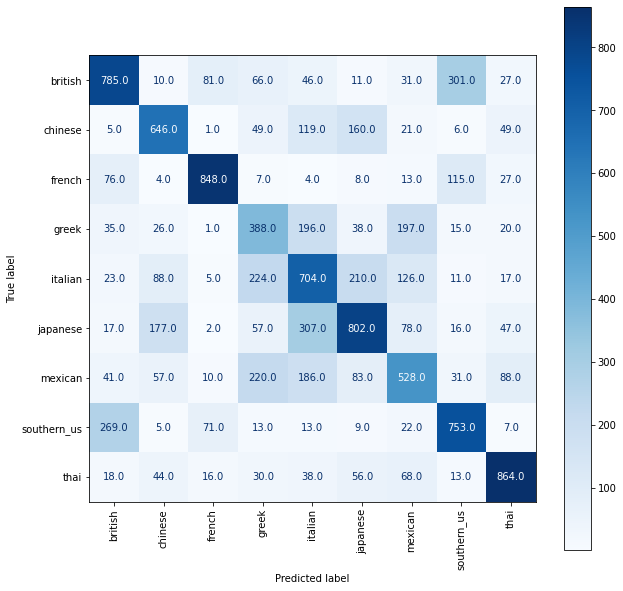

najbolja tacnost je u iteraciji broj:  20


In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
for c in [1,5,10,20,50,100]:
    for F in ['linear','poly','rbf','sigmoid']:
        for mc in ['ovo','ovr']:
            indexes = kf.split(X_undersample, y_undersample)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
            for train_index, test_index in indexes:
                classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                classifier.fit(X_undersample.iloc[train_index,:], y_undersample.iloc[train_index])
                y_pred = classifier.predict(X_undersample.iloc[test_index,:])
                acc_tmp.append(accuracy_score(y_undersample.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y_undersample.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre C=', c, ', kernel=', F, ' i pristup ', mc, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
            #print(fin_conf_mat)

            disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_,)
            fig, ax = plt.subplots(figsize=(10,10))
            disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
            plt.show()

            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

Za konacno odabrane parametre

tacnost je:  0.8110311101380567  a mat. konf. je:


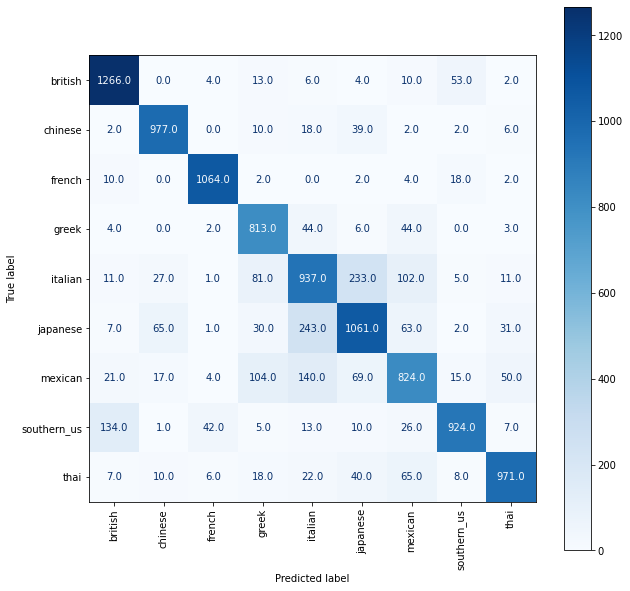

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
acc_tmp = []
indexes = kf.split(X_undersample, y_undersample)
fin_conf_mat1 = np.zeros((len(np.unique(y_undersample)),len(np.unique(y_undersample))))
for train_index, val_index in indexes:
            classifier = SVC(C=10, kernel='rbf', decision_function_shape='ovo')
            classifier.fit(X_undersample.iloc[train_index,:], y_undersample.iloc[train_index])
            y_pred = classifier.predict(X_undersample.iloc[val_index,:])

            acc_tmp.append(accuracy_score(y_undersample.iloc[val_index], y_pred))
            #print(confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y))
            fin_conf_mat1 += confusion_matrix(y_undersample.iloc[val_index], y_pred, labels=labels_y)
            acc_tmp.append(accuracy_score(y_undersample.iloc[val_index], y_pred))

            
print('tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat1,  display_labels=classifier.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(fin_conf_mat1, niz))

Za klasu  british  tacnost je:  0.973568281938326
Za klasu  chinese  tacnost je:  0.9817364170337739
Za klasu  french  tacnost je:  0.9910058737151248
Za klasu  greek  tacnost je:  0.9664096916299559
Za klasu  italian  tacnost je:  0.912169603524229
Za klasu  japanese  tacnost je:  0.9224486049926579
Za klasu  mexican  tacnost je:  0.9324522760646109
Za klasu  southern_us  tacnost je:  0.9687041116005873
Za klasu  thai  tacnost je:  0.973568281938326
prosecna tacnost je:  0.958007015826399


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat1, niz))

Za klasu  british  osetljivost je:  0.9322533136966127
Za klasu  chinese  osetljivost je:  0.9251893939393939
Za klasu  french  osetljivost je:  0.9655172413793104
Za klasu  greek  osetljivost je:  0.8875545851528385
Za klasu  italian  osetljivost je:  0.6654829545454546
Za klasu  japanese  osetljivost je:  0.7059214903526281
Za klasu  mexican  osetljivost je:  0.662379421221865
Za klasu  southern_us  osetljivost je:  0.7951807228915663
Za klasu  thai  osetljivost je:  0.8465562336530078
prosecna osetljivost je:  0.8206705952036307


Obuka finalnog modela

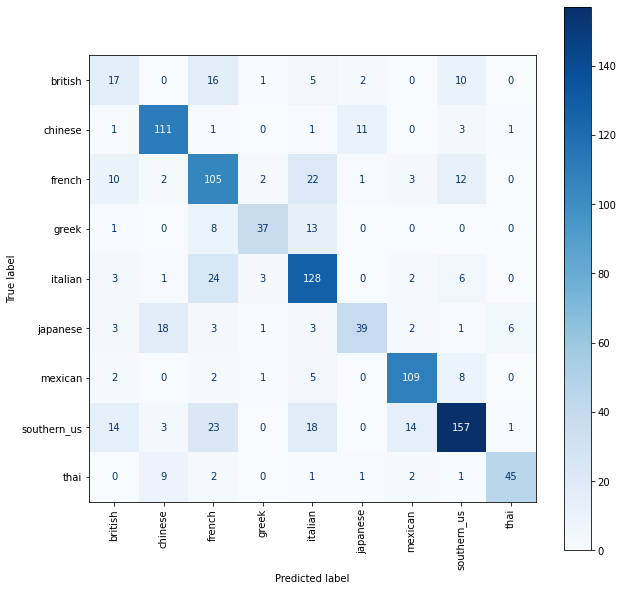

In [ ]:
classifier_svm = SVC(C=10, kernel='rbf', decision_function_shape='ovo', probability=True)
classifier_svm.fit(X_undersample, y_undersample)
y_pred = classifier_svm.predict(X_test)
conf_mat1 = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat1,  display_labels=classifier_svm.classes_,)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap="Blues", values_format='', xticks_rotation=90,ax=ax)  
plt.show()

In [ ]:
print('prosecna tacnost je: ', tacnost_po_klasi(conf_mat1, niz))

Za klasu  british  tacnost je:  0.935666982024598
Za klasu  chinese  tacnost je:  0.9517502365184485
Za klasu  french  tacnost je:  0.8760643330179754
Za klasu  greek  tacnost je:  0.9716177861873226
Za klasu  italian  tacnost je:  0.8987701040681173
Za klasu  japanese  tacnost je:  0.9508041627246925
Za klasu  mexican  tacnost je:  0.9612109744560076
Za klasu  southern_us  tacnost je:  0.8921475875118259
Za klasu  thai  tacnost je:  0.9772942289498581
prosecna tacnost je:  0.935036266162094


In [ ]:
print('prosecna specificnost je: ', specificnost_po_klasi(conf_mat1, niz))

Za klasu  british  specificnost je:  0.9662027833001988
Za klasu  chinese  specificnost je:  0.9644396551724138
Za klasu  french  specificnost je:  0.9122222222222223
Za klasu  greek  specificnost je:  0.9919839679358717
Za klasu  italian  specificnost je:  0.9235955056179775
Za klasu  japanese  specificnost je:  0.9847094801223242
Za klasu  mexican  specificnost je:  0.975268817204301
Za klasu  southern_us  specificnost je:  0.9504232164449818
Za klasu  thai  specificnost je:  0.9919678714859438
prosecna specificnost je:  0.9623126132784705


In [ ]:
print('prosecna osetljivost je: ', osetljivost_po_klasi(conf_mat1, niz))

Za klasu  british  osetljivost je:  0.3333333333333333
Za klasu  chinese  osetljivost je:  0.8604651162790697
Za klasu  french  osetljivost je:  0.6687898089171974
Za klasu  greek  osetljivost je:  0.6271186440677966
Za klasu  italian  osetljivost je:  0.7664670658682635
Za klasu  japanese  osetljivost je:  0.5131578947368421
Za klasu  mexican  osetljivost je:  0.8582677165354331
Za klasu  southern_us  osetljivost je:  0.6826086956521739
Za klasu  thai  osetljivost je:  0.7377049180327869
prosecna osetljivost je:  0.6719903548247663


In [ ]:
print('prosecna preciznost je: ', preciznost_po_klasi(conf_mat1, niz))

Za klasu  british  preciznost je:  0.3333333333333333
Za klasu  chinese  preciznost je:  0.7708333333333334
Za klasu  french  preciznost je:  0.5706521739130435
Za klasu  greek  preciznost je:  0.8222222222222222
Za klasu  italian  preciznost je:  0.6530612244897959
Za klasu  japanese  preciznost je:  0.7222222222222222
Za klasu  mexican  preciznost je:  0.8257575757575758
Za klasu  southern_us  preciznost je:  0.7929292929292929
Za klasu  thai  preciznost je:  0.8490566037735849
prosecna preciznost je:  0.704451997997156


In [ ]:
print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))
print(labels_y)

procenat pogodjenih uzoraka:  0.7076631977294229
preciznost mikro:  0.7076631977294229
preciznost makro:  0.704451997997156
osetljivost mikro:  0.7076631977294229
osetljivost makro:  0.6719903548247663
f mera mikro:  0.7076631977294229
f mera makro:  0.6826606589651971
['japanese' 'greek' 'thai' 'british' 'french' 'italian' 'southern_us'
 'chinese' 'mexican']


In [ ]:
wrong_prediction= y_test!=y_pred

print('procenat sigurnosti u pogresnim: ', classifier_svm.predict_proba(X_test.loc[wrong_prediction,:]).max(axis=1).mean())
print('prosecno siguran u ispravnim: ', classifier_svm.predict_proba(X_test.loc[~wrong_prediction,:]).max(axis=1).mean())

procenat sigurnosti u pogresnim:  0.5904616577851455
prosecno siguran u ispravnim:  0.7956316145136001


FINALNI MODELI

In [ ]:
import pickle

In [ ]:
nedupl_ind1 = y.loc[(y=='southern_us')|(y=='chinese')|(y=='french')|(y=='mexican')|(y=='italian')].index #tu ce biti oni koji se ne dupliraju
dupl_ind1 = y.loc[(y!='southern_us')&(y!='chinese')&(y!='french')&(y!='mexican')&(y!='italian')].index #tu ce biti svi oni koji se dupliraju
y_upsample1 = y.copy(deep=True)
X_upsample1 = X.copy(deep=True)

X_dupl1 = X.loc[dupl_ind1,:]
X_duplicated1 = pd.concat([X_dupl1]*2, ignore_index=True)
X_upsample1 = X_duplicated1.append(X.loc[nedupl_ind1,:], ignore_index=True)

y_dupl1 = y.loc[dupl_ind1]
y_duplicated1 = pd.concat([y_dupl1]*2, ignore_index=True)
y_upsample1 = y_duplicated1.append(y.loc[nedupl_ind1], ignore_index=True)

US_ind1 = y_upsample1.loc[y_upsample1=='southern_us'].index
US_ind_red11 = US_ind1[::2]
US_ind_red21 = US_ind1[::5]
rest_ind1 = y_upsample1.loc[y_upsample1!='southern_us'].index
keep_ind1 = np.concatenate((US_ind_red11,US_ind_red21,rest_ind1))
y_undersample1 = y_upsample1.copy(deep=True)
X_undersample1 = X_upsample1.copy(deep=True)
for i in range(len(y_upsample1)):
    if i not in keep_ind1:
        y_undersample1.drop(i, axis=0, inplace=True)
        X_undersample1.drop(i, axis=0, inplace=True)

In [ ]:
classifier_logReg_fin = LogisticRegression(max_iter = 100, solver = 'newton-cg', multi_class='auto')
classifier_logReg_fin.fit(X_undersample1, y_undersample1)

LogisticRegression(solver='newton-cg')

In [ ]:
classifier_svm_fin = SVC(C=10, kernel='rbf', decision_function_shape='ovo')
classifier_svm_fin.fit(X_undersample1, y_undersample1)

SVC(C=10, decision_function_shape='ovo')

In [ ]:
filename1 = 'Logistic_Regression1.sav'
pickle.dump(classifier_logReg_fin, open(filename1, 'wb'))

In [ ]:
filename2 = 'SVM1.sav'
pickle.dump(classifier_svm_fin, open(filename2, 'wb'))